In [1]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='TRUE'
import torchmetrics

In [2]:
import time

import torch
import torch.nn as nn
from torch.nn import functional as F
class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.bn0=nn.BatchNorm1d(3300)
        self.fc1 = nn.Linear(3300, 2000)
        self.bn1= nn.BatchNorm1d(2000)
        self.fc2 = nn.Linear(2000, 100)
        self.bn2=nn.BatchNorm1d(100)
        self.fc3=nn.Linear(100,9)
        self.bn3=nn.BatchNorm1d(9)
        
        self.drop=nn.Dropout(0.5)
    def forward(self, x):
        x=self.bn0(x)
        x = F.relu(self.drop(self.bn1(self.fc1(x))))
        x = F.relu(self.drop(self.bn2(self.fc2(x))))
        return F.softmax(self.bn3(self.fc3(x)), dim=1)
model = MLP().cuda()
print(model)

class LeNet5(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 6, 5, padding=2)
        self.pool1 = nn.MaxPool2d((2, 2))
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.pool2 = nn.MaxPool2d((2, 2))
        self.fc1 = nn.Linear(16*5*5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool1(x)
        x = F.relu(self.conv2(x))
        x = self.pool2(x)
        x = x.view(len(x), -1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
    
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()

        ## define the layers
        self.conv1 = nn.Conv2d(3, 16, 3, padding=1)
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)
        self.conv3 = nn.Conv2d(32, 64, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.linear1 = nn.Linear(1024, 512)
        self.linear2 = nn.Linear(512, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = x.view(-1, 1024) ## reshaping
        x = F.relu(self.linear1(x))
        x = self.linear2(x)
        return x


class ConvMLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.bn0=nn.BatchNorm1d(3300)
        self.fc1 = nn.Linear(3300, 1100)
        self.bn1= nn.BatchNorm1d(1100)
        self.fc2 = nn.Linear(1100, 100)
        self.bn2=nn.BatchNorm1d(100)
        self.fc3=nn.Linear(100,9)
        self.bn3=nn.BatchNorm1d(9)
        
        self.drop=nn.Dropout(0.5)
        
        self.conv1 = nn.Conv1d(1, 8, 5, padding=2)
        #self.pool1 = nn.MaxPool1d(3,stride=3)
        self.bn4=nn.BatchNorm1d(3300)
        self.conv2 = nn.Conv1d(8, 16, 5,padding=2)
        self.bn5=nn.BatchNorm1d(3300)
        self.pool2 = nn.MaxPool1d(3,stride=3)
        self.conv3=nn.Conv1d(16,1,1,stride=1)
        self.pool3=nn.MaxPool1d(3,stride=3)
        self.bn6=nn.BatchNorm1d(1100)
        #self.fc1 = nn.Linear(16*5*5, 120)
        #self.fc2 = nn.Linear(120, 84)
        #self.fc3 = nn.Linear(84, 10)
        
    def forward(self, x):
        x=self.bn0(x)
        #print('x:',x.shape)
        x1= F.relu(self.drop(self.bn1(self.fc1(x))))
        #print('x1:',x1.shape)
        x0=torch.unsqueeze(x,1)
        x2=F.relu(self.conv1(x0))
        #print('x2:',x2.shape)
        x2=F.relu(self.conv2(x2))
        #print('x2:',x2.shape)
        x2=F.relu(self.conv3(x2))
        #print('x2:',x2.shape)
        x2=torch.squeeze(x2,1)
        x2=self.bn5(x2)
        x2=self.pool3(x2)
        #print('x2:',x2.shape)
        x2=self.bn6(x2)
        x3=torch.add(x1,x2)
        
        x4 = F.relu(self.drop(self.bn2(self.fc2(x3))))
        return F.softmax(self.bn3(self.fc3(x4)), dim=1) 
modelx=ConvMLP()
modelx.cuda()
print(modelx)



MLP(
  (bn0): BatchNorm1d(3300, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=3300, out_features=2000, bias=True)
  (bn1): BatchNorm1d(2000, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc2): Linear(in_features=2000, out_features=100, bias=True)
  (bn2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc3): Linear(in_features=100, out_features=9, bias=True)
  (bn3): BatchNorm1d(9, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (drop): Dropout(p=0.5, inplace=False)
)
ConvMLP(
  (bn0): BatchNorm1d(3300, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=3300, out_features=1100, bias=True)
  (bn1): BatchNorm1d(1100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc2): Linear(in_features=1100, out_features=100, bias=True)
  (bn2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True

In [13]:
import time

import torch
import torch.nn as nn
from torch.nn import functional as F

class ConvMLP2(nn.Module):
    def __init__(self):
        super().__init__()
        self.bn0=nn.BatchNorm1d(3300)
        self.fc1 = nn.Linear(3300, 1100)
        self.bn1= nn.BatchNorm1d(1100)
        self.fc2 = nn.Linear(1100, 100)
        self.bn2=nn.BatchNorm1d(100)
        self.fc3=nn.Linear(100,9)
        self.bn3=nn.BatchNorm1d(9)
        
        self.drop=nn.Dropout(0.5)
        
        self.conv1 = nn.Conv1d(1, 8, 5, padding=2)
        #self.pool1 = nn.MaxPool1d(3,stride=3)
        self.bn4=nn.BatchNorm1d(3300)
        self.conv2 = nn.Conv1d(8, 16, 5,padding=2)
        self.bn5=nn.BatchNorm1d(3300)
        self.pool2 = nn.MaxPool1d(3,stride=3)
        self.conv3=nn.Conv1d(16,1,1,stride=1)
        self.pool3=nn.MaxPool1d(3,stride=3)
        self.bn6=nn.BatchNorm1d(1100)
        #self.fc1 = nn.Linear(16*5*5, 120)
        #self.fc2 = nn.Linear(120, 84)
        #self.fc3 = nn.Linear(84, 10)
        self.bn7=nn.BatchNorm1d(1100)
    def forward(self, x):
        x=self.bn0(x)
        #print('x:',x.shape)
        x1= F.relu(self.drop(self.bn1(self.fc1(x))))
        #print('x1:',x1.shape)
        x0=torch.unsqueeze(x,1)
        x2=F.relu(self.conv1(x0))
        #x2=x2+x0
        #print('x2:',x2.shape)
        x2=F.relu(self.conv2(x2))
        #x2=x2+x0
        #print('x2:',x2.shape)
        x2=F.relu(self.conv3(x2))
        #print('x2:',x2.shape)
        #x2=x0+x2####skip connection
        x2=torch.squeeze(x2,1)
        x2=self.bn5(x2)
        x2=self.pool3(x2)
        #print('x2:',x2.shape)
        x2=self.bn6(x2)
        #x3=torch.add(x1,x2)
        #x3=torch.concat([x1,x2],dim=1)
        x3=torch.add(x1,x2)
        x4=self.bn7(x3)
        x4 = F.relu(self.drop(self.bn2(self.fc2(x3))))
        return F.softmax(self.bn3(self.fc3(x4)), dim=1) 
modely=ConvMLP2()
modely.cuda()
print(modely)

ConvMLP2(
  (bn0): BatchNorm1d(3300, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=3300, out_features=1100, bias=True)
  (bn1): BatchNorm1d(1100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc2): Linear(in_features=1100, out_features=100, bias=True)
  (bn2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc3): Linear(in_features=100, out_features=9, bias=True)
  (bn3): BatchNorm1d(9, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (drop): Dropout(p=0.5, inplace=False)
  (conv1): Conv1d(1, 8, kernel_size=(5,), stride=(1,), padding=(2,))
  (bn4): BatchNorm1d(3300, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv1d(8, 16, kernel_size=(5,), stride=(1,), padding=(2,))
  (bn5): BatchNorm1d(3300, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool2): MaxPool1d(kernel_size=3, stride=3, padding=0, dilation=1, ceil_mode=Fal

In [12]:
import time

import torch
import torch.nn as nn
from torch.nn import functional as F

class ConvMLP3(nn.Module):
    def __init__(self):
        super().__init__()
        self.bn0=nn.BatchNorm1d(3300)
        self.fc1 = nn.Linear(3300, 1650)
        self.bn1= nn.BatchNorm1d(1650)
        self.fc2 = nn.Linear(1650, 100)
        self.bn2=nn.BatchNorm1d(100)
        self.fc3=nn.Linear(100,9)
        self.bn3=nn.BatchNorm1d(9)
        
        self.drop=nn.Dropout(0.5)
        
        self.conv1 = nn.Conv1d(1, 8, 5, padding=2)
        #self.pool1 = nn.MaxPool1d(3,stride=3)
        self.bn4=nn.BatchNorm1d(3300)
        self.conv2 = nn.Conv1d(8, 16, 5,padding=2)
        self.bn5=nn.BatchNorm1d(3300)
        self.pool2 = nn.MaxPool1d(3,stride=3)
        self.conv3=nn.Conv1d(16,1,1,stride=1)
        self.pool3=nn.MaxPool1d(2,stride=2)
        self.bn6=nn.BatchNorm1d(1650)
        #self.fc1 = nn.Linear(16*5*5, 120)
        #self.fc2 = nn.Linear(120, 84)
        #self.fc3 = nn.Linear(84, 10)
        self.bn7=nn.BatchNorm1d(1650)
    def forward(self, x):
        x=self.bn0(x)
        #print('x:',x.shape)
        x1= F.relu(self.drop(self.bn1(self.fc1(x))))
        #print('x1:',x1.shape)
        x0=torch.unsqueeze(x,1)
        x2=F.relu(self.conv1(x0))
        #x2=x2+x0
        #print('x2:',x2.shape)
        x2=F.relu(self.conv2(x2))
        #x2=x2+x0
        #print('x2:',x2.shape)
        x2=F.relu(self.conv3(x2))
        #print('x2:',x2.shape)
        #x2=x0+x2####skip connection
        x2=torch.squeeze(x2,1)
        x2=self.bn5(x2)
        x2=self.pool3(x2)
        #print('x2:',x2.shape)
        x2=self.bn6(x2)
        #x3=torch.add(x1,x2)
        #x3=torch.concat([x1,x2],dim=1)
        x3=torch.add(x1,x2)
        x4=self.bn7(x3)
        x4 = F.relu(self.drop(self.bn2(self.fc2(x3))))
        return F.softmax(self.bn3(self.fc3(x4)), dim=1) 
modelz=ConvMLP3()
modelz.cuda()
print(modelz)

ConvMLP3(
  (bn0): BatchNorm1d(3300, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=3300, out_features=1650, bias=True)
  (bn1): BatchNorm1d(1650, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc2): Linear(in_features=1650, out_features=100, bias=True)
  (bn2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc3): Linear(in_features=100, out_features=9, bias=True)
  (bn3): BatchNorm1d(9, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (drop): Dropout(p=0.5, inplace=False)
  (conv1): Conv1d(1, 8, kernel_size=(5,), stride=(1,), padding=(2,))
  (bn4): BatchNorm1d(3300, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv1d(8, 16, kernel_size=(5,), stride=(1,), padding=(2,))
  (bn5): BatchNorm1d(3300, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool2): MaxPool1d(kernel_size=3, stride=3, padding=0, dilation=1, ceil_mode=Fal

In [19]:
import torch
#import Trainer
#from network import NFM
import torch.utils.data as Data
#from Utils.criteo_loader import getTestData, getTrainData
from torch.nn import functional as F
nfm_config = \
{
    'n_class':9,
    'linear_hidden1':2000,
    #'linear_hidden':100,#线性模型输出层（隐层个数）
    #'embed_input_dim':1001,#embed输入维度
    #'embed_dim': 100, # 用于控制稀疏特征经过Embedding层后的稠密特征大小，embed输出维度
    #'dnn_hidden_units': [100,11],#MLP隐层和输出层
    
    'dnn_hidden_units':[100,9],#MLP隐层
    'num_sparse_features_cols':10477,#the number of the gene columns
    'num_dense_features': 0,#dense features number
    'bi_dropout': 0.5,#Bi-Interaction 的dropout
    'num_epoch': 500,#训练epoch次数
    'batch_size': 16,#batch_size
    'lr': 1e-3,
    'l2_regularization': 1e-4,
    'device_id': 0,
    'use_cuda': False,
    'epoch':1000,
    
    #'train_file': '../Data/criteo/processed_data/train_set.csv',
    #'fea_file': '../Data/criteo/processed_data/fea_col.npy',
    #'validate_file': '../Data/criteo/processed_data/val_set.csv',
    #'test_file': '../Data/criteo/processed_data/test_set.csv',
    #'model_name': '../TrainedModels/NFM.model'
    #'train_file':'data/xiaoqiu_gene_5000/train/final_5000_encode_100x.csv',
    #'train_data':'dataset/qiuguan/encode/encode_1000/train/train_encode_data_1000_new.csv',
    #'train_label':'dataset/qiuguan/non_code/train/train_label.csv',
    #'guan_test_data':'dataset/qiuguan/non_code/guan_test/guan_test_data.csv',
    #'guan_test_label':'dataset/qiuguan/non_code/guan_test/guan_test_label.csv',
    #'test_data':'dataset/qiuguan/encode/encode_1000/test/test_encode_data_1000_new.csv',
    #'test_label':'dataset/qiuguan/non_code/test/test_labels.csv',
    #'title':'dataset/xiaoguan/RF/RF_for_train/train_class_9/test/test_data.csv',
    
    #'all':''
    #'title':'data/xiaoqiu_gene_5000/train/gene_5000_gene_name.csv',
    #'all':'data/xiaoqiu_gene_5000/train/gene_5000_label_name.csv'
}

#model definition
import torch.nn as nn
class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.bn0=nn.BatchNorm1d(3300)
        self.fc1 = nn.Linear(3300, 2000)
        self.bn1= nn.BatchNorm1d(2000)
        self.fc2 = nn.Linear(2000, 100)
        self.bn2=nn.BatchNorm1d(100)
        self.fc3=nn.Linear(100,9)
        self.bn3=nn.BatchNorm1d(9)
        
        self.drop=nn.Dropout(0.5)
    def forward(self, x):
        x=self.bn0(x)
        x = F.relu(self.drop(self.bn1(self.fc1(x))))
        x = F.relu(self.drop(self.bn2(self.fc2(x))))
        return F.softmax(self.bn3(self.fc3(x)), dim=1)
model = MLP().cuda()
#print(model)

class MLP1(nn.Module):
    def __init__(self):
        super().__init__()
        self.bn0=nn.BatchNorm1d(237)
        self.fc1 = nn.Linear(237, 2000)
        self.bn1= nn.BatchNorm1d(2000)
        self.fc2 = nn.Linear(2000, 100)
        self.bn2=nn.BatchNorm1d(100)
        self.fc3=nn.Linear(100,9)
        self.bn3=nn.BatchNorm1d(9)
        
        self.drop=nn.Dropout(0.5)
    def forward(self, x):
        x=self.bn0(x)
        x = F.relu(self.drop(self.bn1(self.fc1(x))))
        x = F.relu(self.drop(self.bn2(self.fc2(x))))
        return F.softmax(self.bn3(self.fc3(x)), dim=1)
model1 = MLP1().cuda()
print(model1)
class MLP2(nn.Module):
    def __init__(self):
        super().__init__()
        self.bn0=nn.BatchNorm1d(126)
        self.fc1 = nn.Linear(126, 2000)
        self.bn1= nn.BatchNorm1d(2000)
        self.fc2 = nn.Linear(2000, 100)
        self.bn2=nn.BatchNorm1d(100)
        self.fc3=nn.Linear(100,9)
        self.bn3=nn.BatchNorm1d(9)
        
        self.drop=nn.Dropout(0.5)
    def forward(self, x):
        x=self.bn0(x)
        x = F.relu(self.drop(self.bn1(self.fc1(x))))
        x = F.relu(self.drop(self.bn2(self.fc2(x))))
        return F.softmax(self.bn3(self.fc3(x)), dim=1)
model2 = MLP2().cuda()
#print(model2)


class MLP3(nn.Module):
    def __init__(self):
        super().__init__()
        self.bn0=nn.BatchNorm1d(177)
        self.fc1 = nn.Linear(177, 2000)
        self.bn1= nn.BatchNorm1d(2000)
        self.fc2 = nn.Linear(2000, 100)
        self.bn2=nn.BatchNorm1d(100)
        self.fc3=nn.Linear(100,9)
        self.bn3=nn.BatchNorm1d(9)
        
        self.drop=nn.Dropout(0.5)
    def forward(self, x):
        x=self.bn0(x)
        x = F.relu(self.drop(self.bn1(self.fc1(x))))
        x = F.relu(self.drop(self.bn2(self.fc2(x))))
        return F.softmax(self.bn3(self.fc3(x)), dim=1)
model3 = MLP3().cuda()
#print(model3)

class MLP4(nn.Module):
    def __init__(self):
        super().__init__()
        self.bn0=nn.BatchNorm1d(131)
        self.fc1 = nn.Linear(131, 2000)
        self.bn1= nn.BatchNorm1d(2000)
        self.fc2 = nn.Linear(2000, 100)
        self.bn2=nn.BatchNorm1d(100)
        self.fc3=nn.Linear(100,9)
        self.bn3=nn.BatchNorm1d(9)
        
        self.drop=nn.Dropout(0.5)
    def forward(self, x):
        x=self.bn0(x)
        x = F.relu(self.drop(self.bn1(self.fc1(x))))
        x = F.relu(self.drop(self.bn2(self.fc2(x))))
        return F.softmax(self.bn3(self.fc3(x)), dim=1)
model4 = MLP4().cuda()

MLP1(
  (bn0): BatchNorm1d(237, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=237, out_features=2000, bias=True)
  (bn1): BatchNorm1d(2000, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc2): Linear(in_features=2000, out_features=100, bias=True)
  (bn2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc3): Linear(in_features=100, out_features=9, bias=True)
  (bn3): BatchNorm1d(9, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (drop): Dropout(p=0.5, inplace=False)
)


In [5]:
import time

import torch
import torch.nn as nn
from torch.nn import functional as F







#print(model4)
import os
import time
import argparse
import numpy as np
import pandas as pd 

import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data
import torch.backends.cudnn as cudnn
#3from tensorboardX import SummaryWriter
import torch.nn.functional as F  # 激励函数的库
#import network
#import config
#import evaluate
#import data_utils
#import Trainer



def one_hot_smoothing(labels, classes, label_smoothing=0.2):
    #n = len(labels)
    n=labels.shape[0]
    eoff = label_smoothing / classes
    output = np.ones((n, classes), dtype=np.float32) * eoff
    for row, label in enumerate(labels):
        output[row, label] = 1 - label_smoothing + eoff
        #print("row:",row,"label:",label)
    return output

def one_hot(labels, classes):
    n = len(labels)
    #eoff = label_smoothing / classes
    output = np.zeros((n, classes), dtype=np.float32)
    for row, label in enumerate(labels):
        output[row, label] = 1
        #print("row:",row,"label:",label)
    return output


def one_hot_smoothing(labels, classes, label_smoothing=0.2):
    #n = len(labels)
    n=labels.shape[0]
    eoff = label_smoothing / classes
    output = np.ones((n, classes), dtype=np.float32) * eoff
    for row, label in enumerate(labels):
        output[row, label] = 1 - label_smoothing + eoff
        #print("row:",row,"label:",label)
    return output

def one_hot(labels, classes):
    n = len(labels)
    #eoff = label_smoothing / classes
    output = np.zeros((n, classes), dtype=np.float32)
    for row, label in enumerate(labels):
        output[row, label] = 1
        #print("row:",row,"label:",label)
    return output



class KZDatasetPredict(data.Dataset):
    """ Construct the FM pytorch dataset. """
    #def __init__(self, file,label_file, feature_map,n_class=16):
    def __init__(self, df_list):
    
       
        self.data_info = self.get_data_info(df_list)
        
        
            
        
        
        

    def __getitem__(self, index):
        # Dataset读取图片的函数
        data,label = self.data_info[index]
        #img = Image.open(img_pth).convert('RGB')
        
        return data,label

    def __len__(self):
        return len(self.data_info)
   
    
    
    def get_data_info(self,df_list):
        #解析路径
        #转为一维list存储，每一位为【图片路径，图片类别】
        labels=[]
        data_info=[]
        print('data_info:',df_list[-1])
        #df=pd.read_csv(csv_path,sep=',')
        #df=df.iloc[:,1:]
        
        #print(df.iloc[:,-1])
        #df=df.applymap(ast.literal_eval)
        label=int(df_list[-1])
        labels.append(label)
        print('labels:',labels)
        data=df_list[:-1]
        #df_np=np.array(df_list)
        #print(rows,cols)
        
        #print('labels:',labels)
        labels=np.array(labels)
        print('labels.shape:',labels.shape)
        #print('labels:',labels)
        #labels=np.array(labels)
        labels=one_hot_smoothing(labels,nfm_config['n_class'])
        #print(labels)
        
           
        
        data=np.array(data)#
            
            
            
            
            
            
            
            
        data=torch.from_numpy(data)#
            
        labels=torch.from_numpy(labels)#
        #bi_data=embding_process(nfm_config,data)
        #print("bi_data.shape:",bi_data.shape)
            
            
        data_info.append((data,label))
        return data_info
class KZDatasetTest(data.Dataset):
    """ Construct the FM pytorch dataset. """
    #def __init__(self, file,label_file, feature_map,n_class=16):
    def __init__(self, csv_path):
    
       
        self.data_info = self.get_data_info(csv_path)
        
        
            
        
        
        

    def __getitem__(self, index):
        # Dataset读取图片的函数
        data, label = self.data_info[index]
        #img = Image.open(img_pth).convert('RGB')
        
        return data, label

    def __len__(self):
        return len(self.data_info)
   
    
    
    def get_data_info(self,csv_path):
        #解析路径
        #转为一维list存储，每一位为【图片路径，图片类别】
        labels=[]
        data_info=[]
        df=pd.read_csv(csv_path,sep=',')
        df=df.iloc[:,1:]
        
        #print(df.iloc[:,-1])
        #df=df.applymap(ast.literal_eval)
        rows,cols=df.shape
        print(rows,cols)
        for i in df.iloc[:,-1]:
            #print(i)
            labels.append(int(i))
        #print('labels:',labels)
        labels=np.array(labels)
        #print('labels:',labels)
        #labels=np.array(labels)
        labels=one_hot_smoothing(labels,nfm_config['n_class'])
        #print(labels)
        for i in range(rows):
            data=df.iloc[i,:-1]
            data=data.astype(float)#
            data=np.array(data)#
            
            label=labels[i]
            #print(data.shape)
            #print(label.shape)
            #label=label.tolist()
            data=torch.from_numpy(data)#
            label=torch.from_numpy(label)#
            
            
            data_info.append((data,label))
        return data_info
import torch
import torch.nn as nn
from torch.utils.data.dataset import *
from PIL import Image
from torch.nn import functional as F
import random
from sklearn.model_selection import train_test_split
import ast
import torchvision


        

class KZDataset(Dataset):
    def __init__(self, csv_path, K,n_class,ki=0, typ='train', transform=None, rand=False):
       
        self.all_data_info = self.get_data_info(csv_path)
        
        if rand:
            random.seed(1)
            random.shuffle(self.all_data_info)
        leng = len(self.all_data_info)
        every_z_len = leng // K
        if typ == 'val':
            self.data_info = self.all_data_info[every_z_len * ki : every_z_len * (ki+1)]
        elif typ == 'train':
            self.data_info = self.all_data_info[: every_z_len * ki] + self.all_data_info[every_z_len * (ki+1) :]
            
        self.transform = transform
        
        

    def __getitem__(self, index):
        # Dataset读取图片的函数
        data, label = self.data_info[index]
        #img = Image.open(img_pth).convert('RGB')
        
        return data, label

    def __len__(self):
        return len(self.data_info)
    
    
    
    def get_data_info(self,csv_path):
        #解析路径
        #转为一维list存储，每一位为【图片路径，图片类别】
        labels=[]
        data_info=[]
        df=pd.read_csv(csv_path,sep=',')
        df=df.iloc[:,1:]
        
        #print(df.iloc[:,-1])
        #df=df.applymap(ast.literal_eval)
        rows,cols=df.shape
        
        print(rows,cols)
        for i in df.iloc[:,-1]:
            #print(i)
            labels.append(int(i))
        #print('labels:',labels)
        labels=np.array(labels)
        #print('labels:',labels)
        #labels=np.array(labels)
        labels=one_hot_smoothing(labels,nfm_config['n_class'])
        #print(labels)
        for i in range(rows):
            data=df.iloc[i,:-1]
            data=data.astype(float)#
            data=np.array(data)#
            
            label=labels[i]
            #print(data.shape)
            #print(label.shape)
            #label=label.tolist()
            data=torch.from_numpy(data)#
            label=torch.from_numpy(label)#
            
            
            data_info.append((data,label))
        return data_info

In [6]:
from torch.autograd import Variable
from torch.utils.data import DataLoader
from sklearn.metrics import roc_auc_score
#from new_nfm_network import NFM
import os
import time
import argparse
import numpy as np
import pandas as pd 
import sys

import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data
#import torch.backends.cudnn as cudnn
#3from tensorboardX import SummaryWriter



In [7]:
#import torchmetrics
            

from torchmetrics.classification import accuracy

def train_epoch(model,train_loader,batch_size,optimizer,loss_func):
    BATCH_SIZE=batch_size
    total = 0
    correct=0
    total_loss=0
    #
    model.train()
    total_train_accuracy=0  
    for batch_idx, (x, labels) in enumerate(train_loader):
            
        labels = Variable(labels)
        x = Variable(x)
            
            
        x=torch.tensor(x,dtype=torch.float)
        labels=torch.tensor(labels,dtype=torch.float)
        x, labels = x.cuda(), labels.cuda()
        labels_int=labels=torch.max(labels,1)[1]
            
            
        optimizer.zero_grad()
        y_predict = model(x)
            
        loss = loss_func(y_predict, labels)
        loss.backward()
        optimizer.step()
            
        loss = loss.item()
           

        total_loss += loss
            
            
            
        #
        '''
        train_acc_en=torchmetrics.Accuracy(task='multiclass',num_classes=9).cuda()
        batch_train_acc=train_acc_en(y_predict,labels_int)
        '''
        batch_train_acc=torchmetrics.functional.accuracy(y_predict,labels_int)
        #batch_train_acc=torchmetrics.classification.Accuracy(y_predict,labels_int)
        
        
        
        #train_acc_en=accuracy(y_predict,labels_int)
        #batch_train_acc=train_acc_en()
        
        total_train_accuracy+=batch_train_acc
            
    total_train_accuracy/=(batch_idx+1)
    print('total_train_accuracy:',total_train_accuracy)
    print("Training Epoch: %d, total loss: %f" % (epoch_id, total_loss))
    return total_loss,total_train_accuracy

def val_epoch(model,test_loader,batch_size,optimizer): 
    batch_size_num=0
    total_test_acc=0
    model.eval()
    for i , (inputs , targets) in enumerate(test_loader):   
            print("test")
            
            inputs = Variable(inputs)   
            targets = Variable(targets)     
           
            inputs=torch.tensor(inputs ,dtype=torch.float)   
            targets=torch.tensor(targets ,dtype=torch.float)   
            inputs , targets = inputs.cuda(),  targets.cuda()   
            yhat = model(inputs)  
            
            
            
            targets=torch.max(targets,1)[1]
            
            
            
            #test_acc_en=torchmetrics.Accuracy(task='multiclass',num_classes=9).cuda()
            batch_test_acc=torchmetrics.functional.accuracy(yhat,targets)
            
            total_test_acc+=batch_test_acc
            
            batch_size_num=i
    total_test_acc/=(batch_size_num+1)
        ###print('total_test_accuracy:',total_test_acc/(batch_size+1))
    print('total_test_accuracy:',total_test_acc)
        
                    
                    
            
            
    
        
   
    
    return total_test_acc


import numpy as np
import math
import matplotlib.pyplot as plt

def plotLoss(loss,epoch):
    plt.rcParams['font.sans-serif']=['SimHei']
    plt.rcParams['axes.unicode_minus'] = False
    plt.figure(figsize=(8, 5))
    x=[i for i in range(epoch)]
    #acc_train=acc_train.cpu()
    #acc_test=acc_test.cpu()
    plt.plot(x, loss, 'r-', mec='k', label='Logistic Loss', lw=2)
    #plt.plot(x,acc_train,'b-',mec='k',label='accuracy Train',lw=2)
    #plt.plot(x,acc_test,'g-',mec='k',label='accuracy Test',lw=2)
    #plt.plot(x, y_01, 'g-', mec='k', label='0/1 Loss', lw=2)
    #plt.plot(x, y_hinge, 'b-',mec='k', label='Hinge Loss', lw=2)
    #plt.plot(x, boost, 'm--',mec='k', label='Adaboost Loss',lw=2)
    plt.grid(True, ls='--')
    plt.legend(loc='upper right')
    plt.title('损失函数')
    plt.show()
 


549 3301
549 3301


/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:20: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:21: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


total_train_accuracy: tensor(0.1354, device='cuda:0')
Training Epoch: 0, total loss: 65.966272
total_train_accuracy: tensor(0.1896, device='cuda:0')
Training Epoch: 1, total loss: 65.146641
total_train_accuracy: tensor(0.2479, device='cuda:0')
Training Epoch: 2, total loss: 64.154590
total_train_accuracy: tensor(0.2812, device='cuda:0')
Training Epoch: 3, total loss: 63.683067
total_train_accuracy: tensor(0.2938, device='cuda:0')
Training Epoch: 4, total loss: 63.305512
total_train_accuracy: tensor(0.3354, device='cuda:0')
Training Epoch: 5, total loss: 62.785126
total_train_accuracy: tensor(0.3875, device='cuda:0')
Training Epoch: 6, total loss: 61.915018
total_train_accuracy: tensor(0.4188, device='cuda:0')
Training Epoch: 7, total loss: 61.444188
total_train_accuracy: tensor(0.4375, device='cuda:0')
Training Epoch: 8, total loss: 60.692389
total_train_accuracy: tensor(0.4396, device='cuda:0')
Training Epoch: 9, total loss: 60.914012
total_train_accuracy: tensor(0.4604, device='cuda:

total_train_accuracy: tensor(0.8563, device='cuda:0')
Training Epoch: 86, total loss: 47.628992
total_train_accuracy: tensor(0.8875, device='cuda:0')
Training Epoch: 87, total loss: 46.810483
total_train_accuracy: tensor(0.8708, device='cuda:0')
Training Epoch: 88, total loss: 47.035826
total_train_accuracy: tensor(0.9000, device='cuda:0')
Training Epoch: 89, total loss: 46.513524
total_train_accuracy: tensor(0.9042, device='cuda:0')
Training Epoch: 90, total loss: 46.343080
total_train_accuracy: tensor(0.8667, device='cuda:0')
Training Epoch: 91, total loss: 47.238916
total_train_accuracy: tensor(0.8708, device='cuda:0')
Training Epoch: 92, total loss: 47.269002
total_train_accuracy: tensor(0.8854, device='cuda:0')
Training Epoch: 93, total loss: 46.996979
total_train_accuracy: tensor(0.8729, device='cuda:0')
Training Epoch: 94, total loss: 46.909176
total_train_accuracy: tensor(0.8688, device='cuda:0')
Training Epoch: 95, total loss: 47.121168
total_train_accuracy: tensor(0.9063, dev

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 25439 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 22833 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 20989 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 25968 missing from current font.
  font.set_text(s, 0.0, flags=flags)
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


total_train_accuracy: tensor(0.8750, device='cuda:0')
Training Epoch: 100, total loss: 46.970646
the  0  epoch ends


/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 25439 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 22833 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 20989 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 25968 missing from current font.
  font.set_text(s, 0, flags=flags)


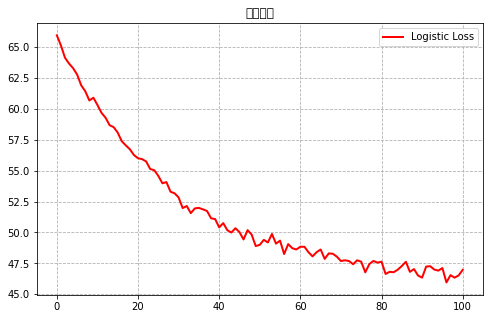

/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:70: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:71: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


test
test
test
total_test_accuracy: tensor(0.7708, device='cuda:0')
acc_test_each_k: tensor(0.7708, device='cuda:0')
549 3301
549 3301
total_train_accuracy: tensor(0.8771, device='cuda:0')
Training Epoch: 0, total loss: 46.705433
total_train_accuracy: tensor(0.8833, device='cuda:0')
Training Epoch: 1, total loss: 46.496019
total_train_accuracy: tensor(0.8979, device='cuda:0')
Training Epoch: 2, total loss: 46.464054
total_train_accuracy: tensor(0.8750, device='cuda:0')
Training Epoch: 3, total loss: 46.665209
total_train_accuracy: tensor(0.8813, device='cuda:0')
Training Epoch: 4, total loss: 46.509235
total_train_accuracy: tensor(0.8854, device='cuda:0')
Training Epoch: 5, total loss: 46.703186
total_train_accuracy: tensor(0.9021, device='cuda:0')
Training Epoch: 6, total loss: 46.348255
total_train_accuracy: tensor(0.8854, device='cuda:0')
Training Epoch: 7, total loss: 46.462531
total_train_accuracy: tensor(0.9000, device='cuda:0')
Training Epoch: 8, total loss: 46.490645
total_trai

total_train_accuracy: tensor(0.9417, device='cuda:0')
Training Epoch: 85, total loss: 44.190359
total_train_accuracy: tensor(0.9375, device='cuda:0')
Training Epoch: 86, total loss: 44.454040
total_train_accuracy: tensor(0.9292, device='cuda:0')
Training Epoch: 87, total loss: 44.281724
total_train_accuracy: tensor(0.9333, device='cuda:0')
Training Epoch: 88, total loss: 44.235087
total_train_accuracy: tensor(0.9500, device='cuda:0')
Training Epoch: 89, total loss: 44.001451
total_train_accuracy: tensor(0.9417, device='cuda:0')
Training Epoch: 90, total loss: 43.906326
total_train_accuracy: tensor(0.9042, device='cuda:0')
Training Epoch: 91, total loss: 44.777644
total_train_accuracy: tensor(0.9375, device='cuda:0')
Training Epoch: 92, total loss: 44.327853
total_train_accuracy: tensor(0.9313, device='cuda:0')
Training Epoch: 93, total loss: 44.413171
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 94, total loss: 43.562593
total_train_accuracy: tensor(0.9333, dev

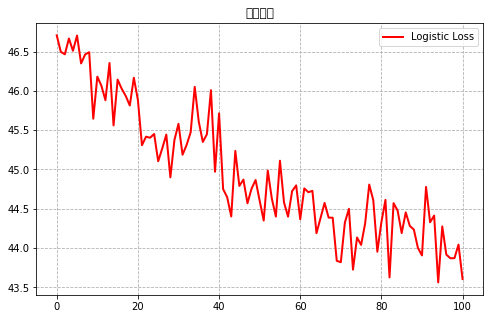

test
test
test
total_test_accuracy: tensor(0.9167, device='cuda:0')
acc_test_each_k: tensor(0.9167, device='cuda:0')
549 3301
549 3301
total_train_accuracy: tensor(0.9354, device='cuda:0')
Training Epoch: 0, total loss: 44.133803
total_train_accuracy: tensor(0.9333, device='cuda:0')
Training Epoch: 1, total loss: 44.142437
total_train_accuracy: tensor(0.9292, device='cuda:0')
Training Epoch: 2, total loss: 44.354326
total_train_accuracy: tensor(0.9500, device='cuda:0')
Training Epoch: 3, total loss: 43.833015
total_train_accuracy: tensor(0.9354, device='cuda:0')
Training Epoch: 4, total loss: 44.131640
total_train_accuracy: tensor(0.9250, device='cuda:0')
Training Epoch: 5, total loss: 44.333047
total_train_accuracy: tensor(0.9521, device='cuda:0')
Training Epoch: 6, total loss: 44.138074
total_train_accuracy: tensor(0.9396, device='cuda:0')
Training Epoch: 7, total loss: 44.296158
total_train_accuracy: tensor(0.9458, device='cuda:0')
Training Epoch: 8, total loss: 44.152936
total_trai

total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 85, total loss: 43.169623
total_train_accuracy: tensor(0.9542, device='cuda:0')
Training Epoch: 86, total loss: 43.236088
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 87, total loss: 43.090057
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 88, total loss: 42.836900
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 89, total loss: 43.083315
total_train_accuracy: tensor(0.9458, device='cuda:0')
Training Epoch: 90, total loss: 43.589929
total_train_accuracy: tensor(0.9458, device='cuda:0')
Training Epoch: 91, total loss: 43.290574
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 92, total loss: 43.124280
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 93, total loss: 43.041455
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 94, total loss: 43.084073
total_train_accuracy: tensor(0.9542, dev

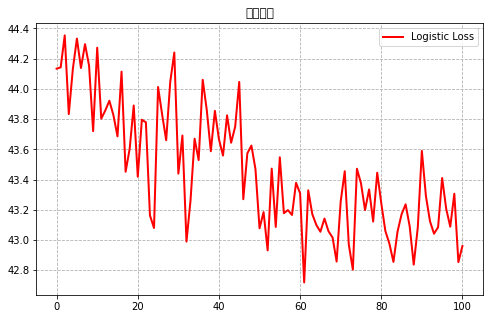

test
test
test
total_test_accuracy: tensor(0.9583, device='cuda:0')
acc_test_each_k: tensor(0.9583, device='cuda:0')
549 3301
549 3301
total_train_accuracy: tensor(0.9438, device='cuda:0')
Training Epoch: 0, total loss: 43.726950
total_train_accuracy: tensor(0.9500, device='cuda:0')
Training Epoch: 1, total loss: 43.378738
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 2, total loss: 42.961013
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 3, total loss: 42.923775
total_train_accuracy: tensor(0.9479, device='cuda:0')
Training Epoch: 4, total loss: 43.409983
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 5, total loss: 42.954618
total_train_accuracy: tensor(0.9563, device='cuda:0')
Training Epoch: 6, total loss: 43.432105
total_train_accuracy: tensor(0.9583, device='cuda:0')
Training Epoch: 7, total loss: 43.068919
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 8, total loss: 42.876669
total_trai

total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 85, total loss: 42.768374
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 86, total loss: 42.395579
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 87, total loss: 42.630623
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 88, total loss: 42.887536
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 89, total loss: 42.771300
total_train_accuracy: tensor(0.9833, device='cuda:0')
Training Epoch: 90, total loss: 42.359402
total_train_accuracy: tensor(0.9521, device='cuda:0')
Training Epoch: 91, total loss: 43.037357
total_train_accuracy: tensor(0.9438, device='cuda:0')
Training Epoch: 92, total loss: 43.353196
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 93, total loss: 42.509240
total_train_accuracy: tensor(0.9542, device='cuda:0')
Training Epoch: 94, total loss: 43.247655
total_train_accuracy: tensor(0.9604, dev

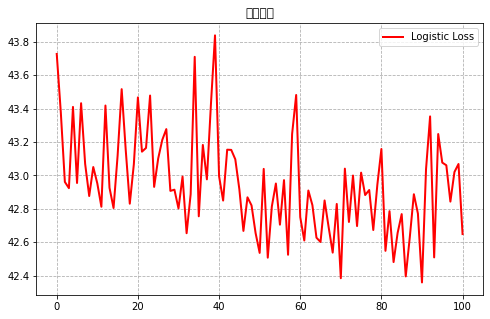

test
test
test
total_test_accuracy: tensor(0.9792, device='cuda:0')
acc_test_each_k: tensor(0.9792, device='cuda:0')
549 3301
549 3301
total_train_accuracy: tensor(0.9542, device='cuda:0')
Training Epoch: 0, total loss: 43.064511
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 1, total loss: 43.232580
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 2, total loss: 42.719710
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 3, total loss: 43.009151
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 4, total loss: 42.794018
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 5, total loss: 42.870045
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 6, total loss: 42.524714
total_train_accuracy: tensor(0.9438, device='cuda:0')
Training Epoch: 7, total loss: 43.214870
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 8, total loss: 42.776392
total_trai

total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 85, total loss: 42.864701
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 86, total loss: 42.481489
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 87, total loss: 42.520604
total_train_accuracy: tensor(0.9854, device='cuda:0')
Training Epoch: 88, total loss: 42.189978
total_train_accuracy: tensor(0.9583, device='cuda:0')
Training Epoch: 89, total loss: 42.798853
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 90, total loss: 42.475262
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 91, total loss: 42.644420
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 92, total loss: 42.386597
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 93, total loss: 42.703215
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 94, total loss: 42.353926
total_train_accuracy: tensor(0.9792, dev

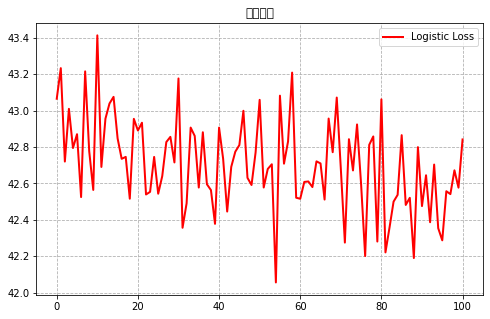

test
test
test
total_test_accuracy: tensor(0.9583, device='cuda:0')
acc_test_each_k: tensor(0.9583, device='cuda:0')
549 3301
549 3301
total_train_accuracy: tensor(0.9563, device='cuda:0')
Training Epoch: 0, total loss: 42.922894
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 1, total loss: 42.542361
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 2, total loss: 42.484544
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 3, total loss: 42.923688
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 4, total loss: 42.698437
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 5, total loss: 42.717129
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 6, total loss: 42.803494
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 7, total loss: 42.697953
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 8, total loss: 42.772589
total_trai

total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 85, total loss: 42.868330
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 86, total loss: 42.691248
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 87, total loss: 42.545735
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 88, total loss: 42.863565
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 89, total loss: 42.780483
total_train_accuracy: tensor(0.9438, device='cuda:0')
Training Epoch: 90, total loss: 43.153942
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 91, total loss: 42.287732
total_train_accuracy: tensor(0.9479, device='cuda:0')
Training Epoch: 92, total loss: 43.436477
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 93, total loss: 42.420340
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 94, total loss: 42.587317
total_train_accuracy: tensor(0.9458, dev

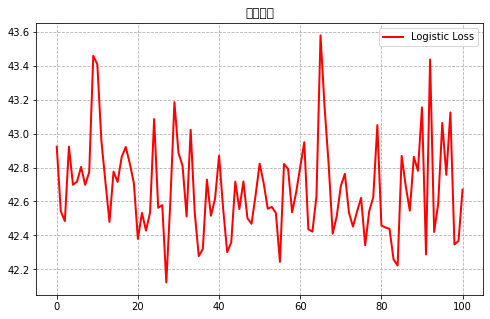

test
test
test
total_test_accuracy: tensor(1., device='cuda:0')
acc_test_each_k: tensor(1., device='cuda:0')
549 3301
549 3301
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 0, total loss: 42.463444
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 1, total loss: 42.433191
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 2, total loss: 42.537389
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 3, total loss: 42.665114
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 4, total loss: 42.718422
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 5, total loss: 42.840825
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 6, total loss: 42.497448
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 7, total loss: 42.623557
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 8, total loss: 42.763401
total_train_accura

total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 85, total loss: 42.816929
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 86, total loss: 42.472435
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 87, total loss: 42.399271
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 88, total loss: 42.446664
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 89, total loss: 42.293168
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 90, total loss: 42.717990
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 91, total loss: 42.255083
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 92, total loss: 42.685318
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 93, total loss: 42.467271
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 94, total loss: 42.387197
total_train_accuracy: tensor(0.9667, dev

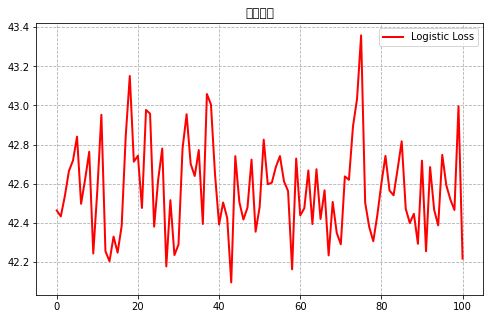

test
test
test
total_test_accuracy: tensor(1., device='cuda:0')
acc_test_each_k: tensor(1., device='cuda:0')
549 3301
549 3301
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 0, total loss: 42.545902
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 1, total loss: 42.491510
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 2, total loss: 42.563949
total_train_accuracy: tensor(0.9813, device='cuda:0')
Training Epoch: 3, total loss: 42.206693
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 4, total loss: 42.641780
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 5, total loss: 42.464146
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 6, total loss: 42.717302
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 7, total loss: 42.670017
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 8, total loss: 42.503237
total_train_accura

total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 85, total loss: 42.428641
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 86, total loss: 42.683960
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 87, total loss: 42.603319
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 88, total loss: 42.261147
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 89, total loss: 42.094058
total_train_accuracy: tensor(0.9583, device='cuda:0')
Training Epoch: 90, total loss: 42.852249
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 91, total loss: 42.295247
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 92, total loss: 42.485089
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 93, total loss: 42.355224
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 94, total loss: 42.320678
total_train_accuracy: tensor(0.9667, dev

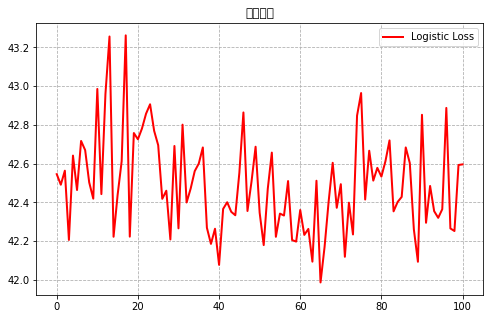

test
test
test
total_test_accuracy: tensor(1., device='cuda:0')
acc_test_each_k: tensor(1., device='cuda:0')
549 3301
549 3301
total_train_accuracy: tensor(0.9583, device='cuda:0')
Training Epoch: 0, total loss: 42.907020
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 1, total loss: 42.633178
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 2, total loss: 42.265485
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 3, total loss: 42.449636
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 4, total loss: 42.342990
total_train_accuracy: tensor(0.9583, device='cuda:0')
Training Epoch: 5, total loss: 42.681601
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 6, total loss: 42.426302
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 7, total loss: 42.562712
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 8, total loss: 42.477920
total_train_accura

total_train_accuracy: tensor(0.9813, device='cuda:0')
Training Epoch: 85, total loss: 42.164641
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 86, total loss: 42.465727
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 87, total loss: 42.207202
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 88, total loss: 42.610926
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 89, total loss: 42.285946
total_train_accuracy: tensor(0.9854, device='cuda:0')
Training Epoch: 90, total loss: 42.075475
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 91, total loss: 42.428480
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 92, total loss: 42.321663
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 93, total loss: 42.323669
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 94, total loss: 42.267647
total_train_accuracy: tensor(0.9792, dev

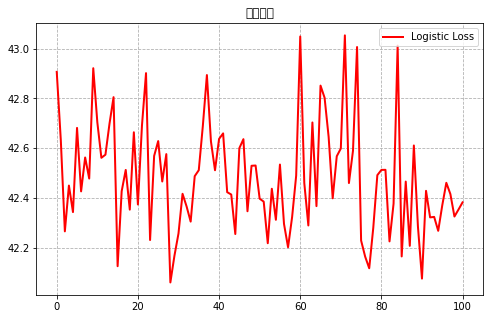

test
test
test
total_test_accuracy: tensor(1., device='cuda:0')
acc_test_each_k: tensor(1., device='cuda:0')
549 3301
549 3301
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 0, total loss: 42.203187
total_train_accuracy: tensor(0.9854, device='cuda:0')
Training Epoch: 1, total loss: 42.032548
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 2, total loss: 42.650376
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 3, total loss: 42.264463
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 4, total loss: 42.698977
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 5, total loss: 42.500135
total_train_accuracy: tensor(0.9583, device='cuda:0')
Training Epoch: 6, total loss: 42.758831
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 7, total loss: 42.558883
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 8, total loss: 42.673446
total_train_accura

total_train_accuracy: tensor(0.9813, device='cuda:0')
Training Epoch: 85, total loss: 42.063483
total_train_accuracy: tensor(0.9854, device='cuda:0')
Training Epoch: 86, total loss: 42.065007
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 87, total loss: 42.332346
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 88, total loss: 42.284796
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 89, total loss: 42.229805
total_train_accuracy: tensor(0.9854, device='cuda:0')
Training Epoch: 90, total loss: 42.026227
total_train_accuracy: tensor(0.9813, device='cuda:0')
Training Epoch: 91, total loss: 42.102732
total_train_accuracy: tensor(0.9813, device='cuda:0')
Training Epoch: 92, total loss: 42.058506
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 93, total loss: 42.348604
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 94, total loss: 42.348304
total_train_accuracy: tensor(0.9813, dev

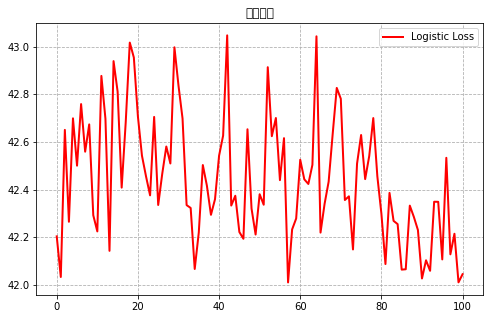

test
test
test
total_test_accuracy: tensor(1., device='cuda:0')
acc_test_each_k: tensor(1., device='cuda:0')
[tensor(0.7708, device='cuda:0'), tensor(0.9167, device='cuda:0'), tensor(0.9583, device='cuda:0'), tensor(0.9792, device='cuda:0'), tensor(0.9583, device='cuda:0'), tensor(1., device='cuda:0'), tensor(1., device='cuda:0'), tensor(1., device='cuda:0'), tensor(1., device='cuda:0'), tensor(1., device='cuda:0')]
[array(0.7708334, dtype=float32), array(0.9166667, dtype=float32), array(0.9583334, dtype=float32), array(0.9791667, dtype=float32), array(0.9583334, dtype=float32), array(1., dtype=float32), array(1., dtype=float32), array(1., dtype=float32), array(1., dtype=float32), array(1., dtype=float32)]
acc_test_metrics: 0.9583334


In [8]:
model=modely
K=10
test_metrics=[]
train_loss_total_list=[]
for ki in range(K):
    trainset = KZDataset(csv_path='dataset/qiuguan/origin_800/xiaoqiu_xiaoguan/train_val_info.csv',K=K, n_class=nfm_config['n_class'],ki=ki,  typ='train', transform=None, rand=True)
    valset = KZDataset(csv_path='dataset/qiuguan/origin_800/xiaoqiu_xiaoguan/train_val_info.csv', K=K,n_class=nfm_config['n_class'],ki=ki,  typ='val', transform=None, rand=True)
    train_loader = data.DataLoader(
         dataset=trainset,
         #transform=torchvision.transforms.ToTensor(),
         drop_last=True,
         batch_size=nfm_config['batch_size'],
         shuffle=True)
    val_loader = data.DataLoader(
         dataset=valset,
         #transform=torchvision.transforms.ToTensor(),
         drop_last=True,
         batch_size=nfm_config['batch_size']
        
     )
    
    model_path='models/ConvMLP2/'
    #BATCH_SIZE=batch_size
    optimizer = torch.optim.Adam(model.parameters(), lr=nfm_config['lr'], weight_decay=nfm_config['l2_regularization'])
    #total = 0
    
    
    loss_func=torch.nn.CrossEntropyLoss()
    
    num=0
   
    
    epoches=101
    for epoch_id in range(epoches):
          
        
        
        train_loss_total,acc_train=train_epoch(model,train_loader,nfm_config['batch_size'],optimizer,loss_func)
        train_loss_total_list.append(train_loss_total)#
        if epoch_id %20==0:
            num=num+1
            #path=os.path.join(model_path,'MLP'+str(num)+str(K)+'.pkl')
            #torch.save(model.state_dict(),path)
            # 保存模型
            
            path=os.path.join(model_path,'MLP'+str(num)+str(K)+'.pt')##################pt
            torch.save(model.state_dict(),path)
            #torch.save(model.state_dict(),path)
    print("the ",ki," epoch ends")
    plotLoss(train_loss_total_list,epoches)
    train_loss_total_list=[]
    acc_test=val_epoch(model,val_loader,nfm_config['batch_size'],optimizer)
    print("acc_test_each_k:",acc_test)
    test_metrics.append(acc_test)

print(test_metrics)
#test_metrics=test_metrics.tolist()
test_metrics=[x.cpu().detach().numpy() for x in test_metrics]
print(test_metrics)
acc_test_metrics=np.mean(test_metrics) 
print("acc_test_metrics:",acc_test_metrics)
       


ConvMLP2(
  (bn0): BatchNorm1d(3300, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=3300, out_features=1100, bias=True)
  (bn1): BatchNorm1d(1100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc2): Linear(in_features=1100, out_features=100, bias=True)
  (bn2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc3): Linear(in_features=100, out_features=9, bias=True)
  (bn3): BatchNorm1d(9, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (drop): Dropout(p=0.5, inplace=False)
  (conv1): Conv1d(1, 8, kernel_size=(5,), stride=(1,), padding=(2,))
  (bn4): BatchNorm1d(3300, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv1d(8, 16, kernel_size=(5,), stride=(1,), padding=(2,))
  (bn5): BatchNorm1d(3300, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool2): MaxPool1d(kernel_size=3, stride=3, padding=0, dilation=1, ceil_mode=Fal

/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:59: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:60: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:59: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:60: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or 

f1_score:  %.4f 0.8862432042342603
accuracy_score: 0.8840579710144928
recall_score: 0.8802365390600685
pre_recall: 0.9038682428891823
n_classes: 9


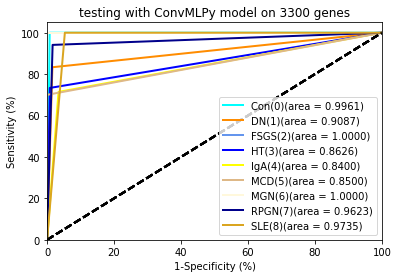

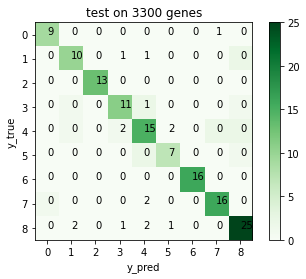

In [10]:
import torch

#功能：加载保存到path中的各层参数到神经网络

#path='dataset/qiuguan/model_new_K_fold_RandomTree/MLP_non_encode/MLP610.pkl'
#path='dataset/qiuguan/model_new_K_fold_RandomTree/MLP_non_encode/MLP9110.pkl'
#path='models/ConvMLPy/ConvMLPy_skip/MLP610.pt'
path='models/ConvMLP2/MLP610.pt'
#path='dataset/qiuguan/model_new_K_fold_RandomTree/MLP_non_encode/MLP10910.pkl'
#nfm=NFM(nfm_config)
#mlp=MLP()
mlp=ConvMLP2()
#print(nfm)
#net = nn.DataParallel(net)
#net = net.to(device)
mlp.load_state_dict(torch.load(path),strict=False)
mlp.cuda()

print(mlp)




mlp_params = list(mlp.named_parameters())
#print(nfm_params)
net=mlp


testset = KZDatasetTest(csv_path='dataset/qiuguan/origin_800/xiaoqiu_xiaoguan/test_info.csv')
   
test_loader = data.DataLoader(
         dataset=testset,
         #transform=torchvision.transforms.ToTensor(),
         
         batch_size=nfm_config['batch_size']
        
     )
#———————————————— 
#版权声明：本文为CSDN博主「山阴少年」的原创文章，遵循CC 4.0 BY-SA版权协议，转载请附上原文出处链接及本声明。 
#原文链接：https://blog.csdn.net/jclian91/article/details/121708431# 
from torch.autograd import Variable 
from torch.utils.data import DataLoader 
from sklearn.metrics import roc_auc_score 
from sklearn.metrics import accuracy_score 
 
def evaluate_model(test_dl, model): 
    model.eval()#测试数据稳定
    predictions, actuals = [], [] 
    for i, (inputs, targets) in enumerate(test_dl): 
        # evaluate the model on the test set 
        #print(\ inputs:\ ,inputs) 
        #print(\ targets:\ ,targets) 
        inputs = Variable(inputs) 
        targets = Variable(targets) 
                 
                 
        #x = torch.tensor(x, dtype=torch.float) 
        #x=x.clone().detach().requires_grad_(True) 
        inputs=torch.tensor(inputs,dtype=torch.float) 
        targets=torch.tensor(targets,dtype=torch.float) 
        inputs, targets = inputs.cuda(), targets.cuda() 
        yhat = model(inputs) 
        yhat=(yhat==torch.max(yhat,1,keepdim=True)[0]).to(dtype=torch.int32)
        # retrieve numpy array 
        #yhat = yhat.detach().numpy() 
        yhat = yhat.detach().cpu().numpy()#转换到cpu 
        # yhat=yhat.argmax(axis=1) 
        #print(yhat:\ ,yhat) 
        #print('yhat.shape:',yhat.shape) 
        actual = targets.detach().cpu().numpy() 
        actual=actual.round() 
        #print(\ actual:\ ,actual) 
        #print('actual.shape:',actual.shape
        #predictions.appe) 
        #actual = actual.reshape(-1, 1) 
        # round to class values 
        yhat = yhat.round() 
        # store nd(yhat) 
        actuals.append(actual) 
        predictions.append(yhat)
    #print("prediction:" ,predictions) 
    #print("actuals:",actuals) 
    predictions, actuals = np.vstack(predictions), np.vstack(actuals) 
    #print("prediction:" ,predictions) 
    #print("actuals:" ,actuals) 
    # calculate accuracy 
    acc_test = accuracy_score(actuals, predictions) 
    return  actuals, predictions,acc_test 

import torch.nn.functional as F 
from sklearn.metrics import precision_recall_curve, average_precision_score,roc_curve, auc, precision_score, recall_score, f1_score, confusion_matrix, accuracy_score 

import torch.nn.functional as F 
from sklearn.metrics import precision_recall_curve, average_precision_score,roc_curve, auc, precision_score, recall_score, f1_score, confusion_matrix, accuracy_score 

import torch.nn.functional as F 

actuals,predictions,acc_test=evaluate_model(test_loader,net)


import torch.nn.functional as F 

actuals,predictions,acc_test=evaluate_model(test_loader,net)


from sklearn.metrics import precision_recall_curve, average_precision_score,roc_curve, auc, precision_score, recall_score, f1_score, confusion_matrix, accuracy_score 
target_list=actuals 
pred_list=predictions 
      
y_true=target_list 
y_pred=pred_list 
      
f1=f1_score(y_true=target_list, y_pred=pred_list, average='macro') # 也可以指定micro模式 
acc_score=accuracy_score(y_true=target_list, y_pred=pred_list) 
rec_score=recall_score(y_true=target_list,y_pred=pred_list,average='macro') # 也可以指定micro模式 
pre_recall=precision_score(y_true=target_list,y_pred=pred_list,average='macro') 
print("f1_score:  %.4f" ,f1) 
print("accuracy_score:" ,acc_score) 
print("recall_score:",rec_score) 
print("pre_recall:" ,pre_recall)



auc_curve = roc_auc_score(y_true, y_pred, multi_class='ovo')
#———————————————— 
#版权声明：本文为CSDN博主「农民小飞侠」的原创文章，遵循CC 4.0 BY-SA版权协议，转载请附上原文出处链接及本声明。 
#原文链接：https://blog.csdn.net/w5688414/article/details/106595892 
PM_y=y_pred 
true_y=y_true 
n_classes=PM_y.shape[1] 
      
print("n_classes:",n_classes) 
fpr = dict() 
tpr = dict() 
roc_auc = dict() 
for i in range(n_classes): 
    fpr[i], tpr[i], _ = roc_curve(true_y[:, i], PM_y[:, i]) 
    roc_auc[i] = auc(fpr[i], tpr[i]) 
    #print(i) 
    #print(fpr) 
    #print(tpr) 
    
    
    
#计算macro auc 
from scipy import interp 
# First aggregate all false positive rates 
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)])) 
       
# Then interpolate all ROC curves at this points 
mean_tpr = np.zeros_like(all_fpr) 
for i in range(n_classes): 
    mean_tpr += interp(all_fpr, fpr[i], tpr[i]) 
       
    # Finally average it and compute AUC 
    mean_tpr /= n_classes 
       
    fpr["macro"] = all_fpr 
    tpr["macro"] = mean_tpr 
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])
    
    
    
#画图 
      
import matplotlib.pyplot as plt 
from itertools import cycle 
from matplotlib.ticker import FuncFormatter 
lw = 2 
# Plot all ROC curves 
plt.figure() 
labels=['Con(0)','DN(1)','FSGS(2)','HT(3)','IgA(4)','MCD(5)','MGN(6)','RPGN(7)','SLE(8)'] 

'''
plt.plot(fpr["macro"], tpr["macro"], 
              label='macro-average ROC curve (area = {0:0.4f})' 
                    ''.format(roc_auc["macro"]), 
              color='navy', linestyle=':', linewidth=4) 
'''

       
colors = cycle(['aqua', 'darkorange', 'cornflowerblue','blue','yellow','burlywood','cornsilk','darkblue','goldenrod','greenyellow','maroon']) 
for i, color in zip(range(n_classes), colors): 
    plt.plot(fpr[i], tpr[i], color=color, lw=lw, 
                  label=labels[i]+'(area = {0:0.4f})'.format(roc_auc[i])) 
       
    plt.plot([0, 1], [0, 1], 'k--', lw=lw) 
    plt.xlim([0.0, 1.0]) 
    plt.ylim([0.0, 1.05]) 
      
      
    plt.xlabel('1-Specificity (%)') 
    plt.ylabel('Sensitivity (%)') 
    #plt.title('testing on kidney tubules with F800 without augment') 
    plt.title('testing with ConvMLPy model on 3300 genes')   

        
def to_percent(temp, position): 
    return '%1.0f'%(100*temp) 
      
plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent)) 
plt.gca().xaxis.set_major_formatter(FuncFormatter(to_percent)) 
plt.legend(loc="lower right" ) 
      
plt.show() 

#———————————————— 
#版权声明：本文为CSDN博主「山阴少年」的原创文章，遵循CC 4.0 BY-SA版权协议，转载请附上原文出处链接及本声明。 
#原文链接：https://blog.csdn.net/jclian91/article/details/103074506/ 
      
from sklearn.metrics import confusion_matrix 
import matplotlib.pyplot as plt 
import matplotlib as mpl 
      
# 支持中文字体显示, 使用于Mac系统 
#zhfont=mpl.font_manager.FontProperties(fname=\ /Library/Fonts/Songti.ttc\ ) 
      
y_true=actuals# = ['北京', '上海', '成都', '成都', '上海', '北京', '上海', '成都', '北京', '上海'] 
y_pred=predictions #= ['北京', '上海', '成都', '上海', '成都', '成都', '上海', '成都', '北京', '上海'] 
      
#ValueError: multilabel-indicator is not supported 
      
classes = [0,1,2,3,4,5,6,7,8] 
#confusion = confusion_matrix(y_true, y_pred)#ValueError: multilabel-indicator is not supported 
      
confusion = confusion_matrix(y_true.argmax(axis=1), y_pred.argmax(axis=1)) 
# 绘制热度图 
plt.imshow(confusion, cmap=plt.cm.Greens) 
indices = range(len(confusion)) 
#plt.xticks(indices, classes, fontproperties=zhfont) 
#plt.yticks(indices, classes, fontproperties=zhfont) 
      
plt.xticks(indices, classes) 
plt.yticks(indices, classes) 
plt.colorbar() 
plt.xlabel('y_pred') 
plt.ylabel('y_true') 
plt.title('test on 3300 genes')      
# 显示数据 
for first_index in range(len(confusion)): 
    for second_index in range(len(confusion[first_index])): 
        plt.text(first_index, second_index, confusion[first_index][second_index]) 
      
# 显示图片 
plt.show()

In [14]:
#find the means for the predicted correctly
from torch.autograd import Variable 
from torch.utils.data import DataLoader 
from sklearn.metrics import roc_auc_score 
from sklearn.metrics import accuracy_score 
 
def bool_predict_model(test_dl, model): 
    model.eval()#测试数据稳定
    error_dataset=torch.tensor([0])
    error_dataset=error_dataset.view(1,1)
    predictions, actuals = [], [] 
    num=0
    for i, (inputs,targets) in enumerate(test_dl): 
        # evaluate the model on the test set 
        #print(\ inputs:\ ,inputs) 
        #print(\ targets:\ ,targets) 
        inputs = Variable(inputs) 
        #bi_inputs=Variable(bi_inputs)
        targets = Variable(targets) 
        #print(targets)
        #print('targets:',targets.shape)        
        #targets=targets.argmax(axis=1)  
        #print('targets:',targets.shape)
        #x = torch.tensor(x, dtype=torch.float) 
        #x=x.clone().detach().requires_grad_(True) 
        inputs=torch.tensor(inputs,dtype=torch.float) 
        #bi_inputs=torch.tensor(bi_inputs,dtype=torch.float)
        targets=torch.tensor(targets,dtype=torch.float) 
        inputs, targets = inputs.cuda(),targets.cuda() 
        yhat = model(inputs) 
        
        yhat=yhat.argmax(axis=1)
        print('yhat:',yhat.shape)
        
        if targets==yhat:
            return True
        else:
            return False
#find

In [15]:
#find the samples that predicted correctly
import pandas as pd 
test_df=pd.read_csv('dataset/qiuguan/origin_800/xiaoqiu_xiaoguan/test_info1.csv',sep=',')
test_df=test_df.iloc[:,1:]
rows,cols=test_df.shape
print(rows,cols)
import torch

#功能：加载保存到path中的各层参数到神经网络

path='models/ConvMLP2/MLP610.pt'

#nfm=NFM(nfm_config)
#mlp=MLP()
model=ConvMLP2()
#print(nfm)
#net = nn.DataParallel(net)
#net = net.to(device)
model.load_state_dict(torch.load(path),strict=False)
model.cuda()

print(model)




model_params = list(model.named_parameters())
#print(nfm_params)
net=model


#testset = KZDatasetPredict(test_df)
''''
test_loader = data.DataLoader(
         dataset=testset,
         #transform=torchvision.transforms.ToTensor(),
         drop_last=True,
         batch_size=nfm_config['batch_size']
        
     )
'''
false_list=[]
for i in range(rows):
    df_list=test_df.iloc[i,:].tolist()
    print(type(df_list))
    print('df_list:',df_list[-1])
    #print(data_set)
    print('this is data_set')
    data_set = KZDatasetPredict(df_list)
    data_test_loader=data.DataLoader(dataset=data_set,
                                    batch_size=1)
    print(data_test_loader)
    bool_index=bool_predict_model(data_test_loader,model)
    print(bool_index)
    if bool_index==False:
        
        false_list.append(i)
        #test_df=test_df.drop(index=i, inplace=True)
        
for i,aitem in enumerate(false_list):
    test_df.drop(index=i, inplace=True)
print(test_df.shape)   

test_df.to_csv('dataset/qiuguan/origin_800/xiaoqiu_xiaoguan/ConvMLP2/test_info3.csv')

138 3301
ConvMLP2(
  (bn0): BatchNorm1d(3300, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=3300, out_features=1100, bias=True)
  (bn1): BatchNorm1d(1100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc2): Linear(in_features=1100, out_features=100, bias=True)
  (bn2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc3): Linear(in_features=100, out_features=9, bias=True)
  (bn3): BatchNorm1d(9, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (drop): Dropout(p=0.5, inplace=False)
  (conv1): Conv1d(1, 8, kernel_size=(5,), stride=(1,), padding=(2,))
  (bn4): BatchNorm1d(3300, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv1d(8, 16, kernel_size=(5,), stride=(1,), padding=(2,))
  (bn5): BatchNorm1d(3300, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool2): MaxPool1d(kernel_size=3, stride=3, padding=0, dilation=1, ceil

/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:26: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:28: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


yhat: torch.Size([1])
True
<class 'list'>
df_list: 2.0
this is data_set
data_info: 2.0
labels: [2]
labels.shape: (1,)
yhat: torch.Size([1])
True
<class 'list'>
df_list: 1.0
this is data_set
data_info: 1.0
labels: [1]
labels.shape: (1,)
yhat: torch.Size([1])
True
<class 'list'>
df_list: 4.0
this is data_set
data_info: 4.0
labels: [4]
labels.shape: (1,)
yhat: torch.Size([1])
True
<class 'list'>
df_list: 0.0
this is data_set
data_info: 0.0
labels: [0]
labels.shape: (1,)
yhat: torch.Size([1])
True
<class 'list'>
df_list: 8.0
this is data_set
data_info: 8.0
labels: [8]
labels.shape: (1,)
yhat: torch.Size([1])
True
<class 'list'>
df_list: 0.0
this is data_set
data_info: 0.0
labels: [0]
labels.shape: (1,)
yhat: torch.Size([1])
True
<class 'list'>
df_list: 5.0
this is data_set
data_info: 5.0
labels: [5]
labels.shape: (1,)
yhat: torch.Size([1])
True
<class 'list'>
df_list: 3.0
this is data_set
data_info: 3.0
labels: [3]
labels.shape: (1,)
yhat: torch.Size([1])
False
<class 'list'>
df_list: 6.0


yhat: torch.Size([1])
True
<class 'list'>
df_list: 8.0
this is data_set
data_info: 8.0
labels: [8]
labels.shape: (1,)
yhat: torch.Size([1])
True
<class 'list'>
df_list: 8.0
this is data_set
data_info: 8.0
labels: [8]
labels.shape: (1,)
yhat: torch.Size([1])
True
<class 'list'>
df_list: 4.0
this is data_set
data_info: 4.0
labels: [4]
labels.shape: (1,)
yhat: torch.Size([1])
True
<class 'list'>
df_list: 6.0
this is data_set
data_info: 6.0
labels: [6]
labels.shape: (1,)
yhat: torch.Size([1])
True
<class 'list'>
df_list: 8.0
this is data_set
data_info: 8.0
labels: [8]
labels.shape: (1,)
yhat: torch.Size([1])
True
<class 'list'>
df_list: 2.0
this is data_set
data_info: 2.0
labels: [2]
labels.shape: (1,)
yhat: torch.Size([1])
True
<class 'list'>
df_list: 1.0
this is data_set
data_info: 1.0
labels: [1]
labels.shape: (1,)
yhat: torch.Size([1])
True
<class 'list'>
df_list: 3.0
this is data_set
data_info: 3.0
labels: [3]
labels.shape: (1,)
yhat: torch.Size([1])
True
<class 'list'>
df_list: 7.0
t

yhat: torch.Size([1])
True
<class 'list'>
df_list: 7.0
this is data_set
data_info: 7.0
labels: [7]
labels.shape: (1,)
yhat: torch.Size([1])
True
<class 'list'>
df_list: 2.0
this is data_set
data_info: 2.0
labels: [2]
labels.shape: (1,)
yhat: torch.Size([1])
True
<class 'list'>
df_list: 8.0
this is data_set
data_info: 8.0
labels: [8]
labels.shape: (1,)
yhat: torch.Size([1])
True
<class 'list'>
df_list: 3.0
this is data_set
data_info: 3.0
labels: [3]
labels.shape: (1,)
yhat: torch.Size([1])
True
<class 'list'>
df_list: 4.0
this is data_set
data_info: 4.0
labels: [4]
labels.shape: (1,)
yhat: torch.Size([1])
True
<class 'list'>
df_list: 6.0
this is data_set
data_info: 6.0
labels: [6]
labels.shape: (1,)
yhat: torch.Size([1])
True
<class 'list'>
df_list: 2.0
this is data_set
data_info: 2.0
labels: [2]
labels.shape: (1,)
yhat: torch.Size([1])
True
<class 'list'>
df_list: 7.0
this is data_set
data_info: 7.0
labels: [7]
labels.shape: (1,)
yhat: torch.Size([1])
True
<class 'list'>
df_list: 7.0
t

In [17]:
#compute mean value of all the correctly predicted samples:
import pandas as pd 
import torch
import numpy as np
test_df=pd.read_csv('dataset/qiuguan/origin_800/xiaoqiu_xiaoguan/ConvMLP2/test_info3.csv',sep=',')
test_df=test_df.iloc[:,1:]
rows,cols=test_df.shape
print(rows,cols)
columns=test_df.columns[:-1].tolist()
#columns=torch.tensor(columns).cuda()#ValueError: too many dimensions 'str'


row_mean=test_df.mean(axis=0)
print(row_mean)
row_mean=row_mean[:-1]#drop off label
row_mean_np=np.array(row_mean).reshape(1,-1)
print(row_mean_np)
row_mean_df=pd.DataFrame(row_mean_np)
print(row_mean_df)
row_mean_df.columns=test_df.columns[:-1]
print(row_mean_df)
row_mean_tensor=torch.from_numpy(row_mean_np).cuda()
row_mean_tensor=torch.tensor(row_mean_tensor,dtype=torch.float)
#去掉行




#compute contribution using the Equ.
import torch

#功能：加载保存到path中的各层参数到神经网络

import torch

#功能：加载保存到path中的各层参数到神经网络

import torch

#功能：加载保存到path中的各层参数到神经网络

import torch

#功能：加载保存到path中的各层参数到神经网络

import torch

#功能：加载保存到path中的各层参数到神经网络

path='models/ConvMLP2/MLP610.pt'

#nfm=NFM(nfm_config)
model=ConvMLP2()
#print(nfm)
#net = nn.DataParallel(net)
#net = net.to(device)
model.load_state_dict(torch.load(path),strict=False)
model.cuda()

print(model)




model_params = list(model.named_parameters())
#print(nfm_params)
net=model



weight={}
for name,parameters in net.named_parameters():
    print(name,':',parameters.size())
    #names.append(name)
    weight[name]=parameters
print("weight:",weight)
#q
'''
bn0.weight : torch.Size([3300])
bn0.bias : torch.Size([3300])
fc1.weight : torch.Size([2000, 3300])
fc1.bias : torch.Size([2000])
bn1.weight : torch.Size([2000])
bn1.bias : torch.Size([2000])
fc2.weight : torch.Size([100, 2000])
fc2.bias : torch.Size([100])
bn2.weight : torch.Size([100])
bn2.bias : torch.Size([100])
fc3.weight : torch.Size([9, 100])
fc3.bias : torch.Size([9])
bn3.weight : torch.Size([9])
bn3.bias : torch.Size([9])
'''






def one_hot_smoothing(labels, classes, label_smoothing=0.2):
    n = len(labels)
    #n=labels.shape[0]
    eoff = label_smoothing / classes
    output = np.ones((n, classes), dtype=np.float32) * eoff
    for row, label in enumerate(labels):
        output[row, label] = 1 - label_smoothing + eoff
        #print("row:",row,"label:",label)
    return output







l3=torch.mm(weight['fc3.weight'],weight['fc2.weight'])
print('l3:',l3.shape)
l2=torch.mm(l3,weight['fc1.weight'])
print('l2:',l2.shape)
contri_k=[]
contri_k_names=[]
for i in range(nfm_config['n_class']):
    l1=torch.mm(l2,row_mean_tensor.T)
    uu=l2[i,:]*row_mean_tensor.reshape(3300)
    print(uu.shape)
    top_k=torch.topk(uu,20,largest=True)#################20
    print('top_k:',top_k)
    
    contri_k.append(top_k)
    top_k_indices=top_k.indices.cpu().detach().numpy().tolist()
    print('top_k_indices:',top_k_indices)
    top_k_names=[columns[j] for j in top_k_indices]
    print(top_k_names)
    contri_k_names.append(top_k_names)

contri_k_names_np=np.array(contri_k_names)
print(contri_k_names_np.shape)

contri_k_names_df=pd.DataFrame(contri_k_names_np)
contri_k_names_df.to_csv('results_genes/ConvMLP2/contri_20_names_df.csv')
#from chartGPT of the following code
result = set()
for sublist in contri_k_names:
    result = result.union(sublist)

# 或者使用集合的union方法的更简洁写法，使用集合解析
# result = set().union(*list_of_lists)

# 或者使用 | 运算符
# result = set().union(*list_of_lists)

# 将结果转回列表
result_list = list(result)

print(result_list)

import csv
csv_filename = "results_genes/ConvMLP2/genes_all_20_mean.csv"

# 使用CSV模块保存列表为CSV文件
with open(csv_filename, mode='w', newline='') as file:
    writer = csv.writer(file)
    
    writer.writerow(result_list)

#这将输出所有列表的并集，不包含重复的元素。在这个例子中，结果会是 [1, 2, 3, 4, 5, 6, 7]。你可以根据你的实际需求将这个结果转换为列表或者保留为集合，具体取决于你的应用场景。
#抽取训练集和测试集中的数据

#生成新选取元素的数据集
train_path='dataset/qiuguan/origin_800/xiaoqiu_xiaoguan/train_val_info.csv'
test_path='dataset/qiuguan/origin_800/xiaoqiu_xiaoguan/test_info.csv'

train_df=pd.read_csv(train_path,sep=',')
train_df1=train_df
print(train_df1.columns)
train_df=train_df.iloc[:,1:]
train_df1=train_df1.iloc[:,1:-1]

columns=result_list
columns.append('label')
print(columns)


train_df2=train_df[columns]
print(train_df2.shape)
train_df2.to_csv('dataset/qiuguan/origin_800/xiaoqiu_xiaoguan/ConvMLP2/train_val_info.csv')

test_df=pd.read_csv(test_path,sep=',')

test_df=test_df.iloc[:,1:]



test_df=test_df[columns]
print(test_df.shape)
test_df.to_csv('dataset/qiuguan/origin_800/xiaoqiu_xiaoguan/ConvMLP2/test_info.csv')





127 3301
RHOA       11.731929
STX2        7.577847
CISD1       9.564566
WDR11       8.230538
SCYL2       6.845058
             ...    
SULT1A1    10.197430
AMOT       11.482899
CA1         6.468715
GPR35       5.414966
label       4.606299
Length: 3301, dtype: float64
[[11.73192898  7.57784708  9.56456584 ... 11.48289942  6.46871495
   5.41496553]]
        0         1         2         3         4         5         6     \
0  11.731929  7.577847  9.564566  8.230538  6.845058  4.995713  9.384533   

       7         8        9     ...      3290      3291      3292      3293  \
0  5.562264  5.007456  6.60827  ...  8.134803  6.172875  8.005228  6.368283   

       3294      3295      3296       3297      3298      3299  
0  7.576208  6.671936  10.19743  11.482899  6.468715  5.414966  

[1 rows x 3300 columns]
        RHOA      STX2     CISD1     WDR11     SCYL2   MGC2889    CCDC47  \
0  11.731929  7.577847  9.564566  8.230538  6.845058  4.995713  9.384533   

       KLF8      CCL1  SLCO3A

/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


{'bn0.weight': Parameter containing:
tensor([ 0.0003,  0.0035, -0.0007,  ...,  0.0008, -0.0048, -0.0022],
       device='cuda:0', requires_grad=True), 'bn0.bias': Parameter containing:
tensor([-4.6566e-07, -2.3203e-07,  1.4490e-07,  ...,  1.4106e-07,
         8.1307e-08, -1.3025e-07], device='cuda:0', requires_grad=True), 'fc1.weight': Parameter containing:
tensor([[-6.9734e-03, -1.6063e-04, -2.2301e-03,  ..., -2.9057e-03,
          4.5216e-03,  1.9657e-03],
        [ 6.2093e-40, -5.5237e-40, -6.0649e-40,  ..., -5.1544e-40,
         -5.5871e-40, -5.3429e-40],
        [-2.0304e-04, -2.5174e-04, -1.2379e-06,  ...,  3.2841e-05,
          4.8981e-04,  2.3660e-04],
        ...,
        [ 2.0786e-40, -2.0915e-40, -4.1688e-40,  ..., -7.7111e-41,
          3.6967e-40, -2.4226e-40],
        [-2.5658e-04,  6.8708e-05,  9.0946e-06,  ..., -1.3113e-05,
          1.7996e-04,  6.8511e-05],
        [ 5.4349e-40,  1.8795e-40,  4.7586e-40,  ..., -4.6164e-40,
          5.0073e-40, -2.5166e-41]], device='

Index(['Unnamed: 0', 'RHOA', 'STX2', 'CISD1', 'WDR11', 'SCYL2', 'MGC2889',
       'CCDC47', 'KLF8', 'CCL1',
       ...
       'PLAC4', 'NRBP1', 'LRRC23', 'SPHK2', 'KIAA0513', 'SULT1A1', 'AMOT',
       'CA1', 'GPR35', 'label'],
      dtype='object', length=3302)
['UQCR10', 'ACLY', 'TFAP2A', 'GEMIN6', 'PTP4A1', 'SERPINA3', 'ADM2', 'MEST', 'RHOB', 'OLFML3', 'COX15', 'NEAT1', 'PEG10', 'GPX2', 'FOS', 'TESC', 'PTMS', 'PLEKHA5', 'TMEM100', 'ALB', 'CYP2J2', 'FKBP4', 'WDR12', 'CHODL', 'VDR', 'COL4A3BP', 'METTL9', 'ACAD10', 'ACAT2', 'EPM2AIP1', 'VAMP8', 'NR0B2', 'HERC5', 'GPX3', 'AHCYL1', 'PPP6R1', 'RPS24', 'UCHL1', 'CFB', 'CFLAR', 'LIPC', 'EGLN3', 'DUSP6', 'MS4A4A', 'SLC3A2', 'MRPL19', 'MRPS15', 'ACTA2', 'LGMN', 'GDF15', 'NPIPB15', 'LHPP', 'MAP3K1', 'PCK1', 'UGDH', 'WARS2', 'CTTN', 'MRPS16', 'WASHC3', 'COMMD10', 'IFIT1', 'CRABP2', 'KLF9', 'ISCU', 'OXCT1', 'VTCN1', 'RRM2', 'RPS27L', 'NDUFB1', 'HIRA', 'AKR1C2', 'ACE', 'TDP2', 'SPI1', 'CTSG', 'ADI1', 'ABHD2', 'TTC1', 'CAMLG', 'TRA2A', 'ATP5IF1', '

549 132
549 132
total_train_accuracy: tensor(0.2521, device='cuda:0')
Training Epoch: 0, total loss: 64.082679


/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:20: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:21: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


total_train_accuracy: tensor(0.5250, device='cuda:0')
Training Epoch: 1, total loss: 60.395952
total_train_accuracy: tensor(0.6188, device='cuda:0')
Training Epoch: 2, total loss: 58.924143
total_train_accuracy: tensor(0.7146, device='cuda:0')
Training Epoch: 3, total loss: 57.680780
total_train_accuracy: tensor(0.6896, device='cuda:0')
Training Epoch: 4, total loss: 56.800175
total_train_accuracy: tensor(0.7500, device='cuda:0')
Training Epoch: 5, total loss: 55.695138
total_train_accuracy: tensor(0.7438, device='cuda:0')
Training Epoch: 6, total loss: 55.662398
total_train_accuracy: tensor(0.7729, device='cuda:0')
Training Epoch: 7, total loss: 54.648057
total_train_accuracy: tensor(0.7958, device='cuda:0')
Training Epoch: 8, total loss: 54.134582
total_train_accuracy: tensor(0.8188, device='cuda:0')
Training Epoch: 9, total loss: 53.325042
total_train_accuracy: tensor(0.8083, device='cuda:0')
Training Epoch: 10, total loss: 53.560118
total_train_accuracy: tensor(0.8292, device='cuda

total_train_accuracy: tensor(0.9313, device='cuda:0')
Training Epoch: 87, total loss: 45.630091
total_train_accuracy: tensor(0.9375, device='cuda:0')
Training Epoch: 88, total loss: 45.627150
total_train_accuracy: tensor(0.9396, device='cuda:0')
Training Epoch: 89, total loss: 45.542172
total_train_accuracy: tensor(0.9313, device='cuda:0')
Training Epoch: 90, total loss: 45.566178
total_train_accuracy: tensor(0.9271, device='cuda:0')
Training Epoch: 91, total loss: 45.411927
total_train_accuracy: tensor(0.9271, device='cuda:0')
Training Epoch: 92, total loss: 45.689463
total_train_accuracy: tensor(0.8979, device='cuda:0')
Training Epoch: 93, total loss: 46.295513
total_train_accuracy: tensor(0.9417, device='cuda:0')
Training Epoch: 94, total loss: 45.246950
total_train_accuracy: tensor(0.9396, device='cuda:0')
Training Epoch: 95, total loss: 45.649999
total_train_accuracy: tensor(0.9417, device='cuda:0')
Training Epoch: 96, total loss: 45.308985
total_train_accuracy: tensor(0.9604, dev

/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 25439 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 22833 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 20989 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 25968 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 25439 missing from current font.
  font.set_text(s, 0, 

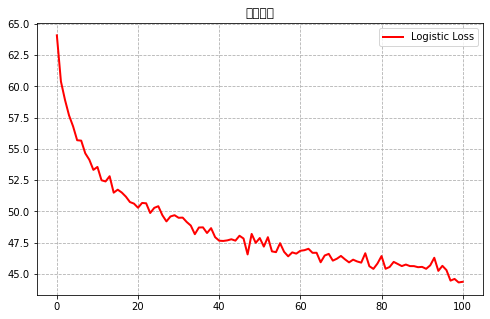

test
test
test
total_test_accuracy: tensor(0.8333, device='cuda:0')
acc_test_each_k: tensor(0.8333, device='cuda:0')
549 132


/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:70: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:71: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


549 132
total_train_accuracy: tensor(0.9104, device='cuda:0')
Training Epoch: 0, total loss: 45.748493
total_train_accuracy: tensor(0.9313, device='cuda:0')
Training Epoch: 1, total loss: 45.272549
total_train_accuracy: tensor(0.9271, device='cuda:0')
Training Epoch: 2, total loss: 45.366596
total_train_accuracy: tensor(0.9292, device='cuda:0')
Training Epoch: 3, total loss: 45.298339
total_train_accuracy: tensor(0.9521, device='cuda:0')
Training Epoch: 4, total loss: 45.063376
total_train_accuracy: tensor(0.9521, device='cuda:0')
Training Epoch: 5, total loss: 44.710545
total_train_accuracy: tensor(0.9542, device='cuda:0')
Training Epoch: 6, total loss: 44.889547
total_train_accuracy: tensor(0.9271, device='cuda:0')
Training Epoch: 7, total loss: 45.329556
total_train_accuracy: tensor(0.9333, device='cuda:0')
Training Epoch: 8, total loss: 45.151912
total_train_accuracy: tensor(0.9417, device='cuda:0')
Training Epoch: 9, total loss: 44.883675
total_train_accuracy: tensor(0.9354, devic

total_train_accuracy: tensor(0.9563, device='cuda:0')
Training Epoch: 87, total loss: 43.505183
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 88, total loss: 43.727481
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 89, total loss: 43.447641
total_train_accuracy: tensor(0.9542, device='cuda:0')
Training Epoch: 90, total loss: 43.451634
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 91, total loss: 43.605506
total_train_accuracy: tensor(0.9438, device='cuda:0')
Training Epoch: 92, total loss: 43.879743
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 93, total loss: 43.679718
total_train_accuracy: tensor(0.9479, device='cuda:0')
Training Epoch: 94, total loss: 43.714595
total_train_accuracy: tensor(0.9583, device='cuda:0')
Training Epoch: 95, total loss: 43.426465
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 96, total loss: 43.330130
total_train_accuracy: tensor(0.9583, dev

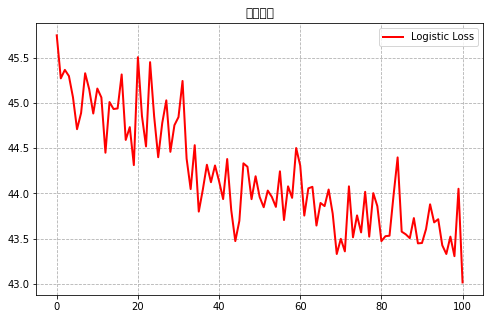

test
test
test
total_test_accuracy: tensor(0.9167, device='cuda:0')
acc_test_each_k: tensor(0.9167, device='cuda:0')
549 132
549 132
total_train_accuracy: tensor(0.9438, device='cuda:0')
Training Epoch: 0, total loss: 43.752698
total_train_accuracy: tensor(0.9583, device='cuda:0')
Training Epoch: 1, total loss: 43.609994
total_train_accuracy: tensor(0.9542, device='cuda:0')
Training Epoch: 2, total loss: 43.641908
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 3, total loss: 43.014466
total_train_accuracy: tensor(0.9521, device='cuda:0')
Training Epoch: 4, total loss: 43.532735
total_train_accuracy: tensor(0.9479, device='cuda:0')
Training Epoch: 5, total loss: 43.814430
total_train_accuracy: tensor(0.9563, device='cuda:0')
Training Epoch: 6, total loss: 43.499058
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 7, total loss: 43.511500
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 8, total loss: 42.907578
total_train_

total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 86, total loss: 43.173599
total_train_accuracy: tensor(0.9583, device='cuda:0')
Training Epoch: 87, total loss: 43.357589
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 88, total loss: 43.003101
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 89, total loss: 42.600115
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 90, total loss: 42.487357
total_train_accuracy: tensor(0.9813, device='cuda:0')
Training Epoch: 91, total loss: 42.748051
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 92, total loss: 42.852240
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 93, total loss: 42.913780
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 94, total loss: 42.883522
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 95, total loss: 42.789892
total_train_accuracy: tensor(0.9563, dev

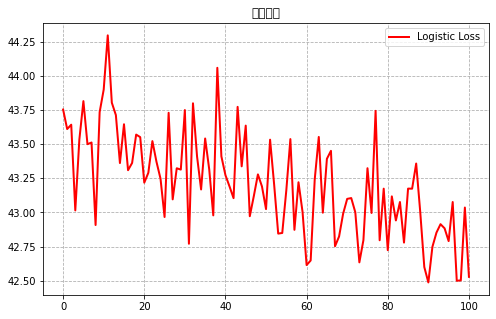

test
test
test
total_test_accuracy: tensor(1., device='cuda:0')
acc_test_each_k: tensor(1., device='cuda:0')
549 132
549 132
total_train_accuracy: tensor(0.9583, device='cuda:0')
Training Epoch: 0, total loss: 43.529074
total_train_accuracy: tensor(0.9500, device='cuda:0')
Training Epoch: 1, total loss: 43.215411
total_train_accuracy: tensor(0.9500, device='cuda:0')
Training Epoch: 2, total loss: 43.361696
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 3, total loss: 42.956755
total_train_accuracy: tensor(0.9583, device='cuda:0')
Training Epoch: 4, total loss: 43.358103
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 5, total loss: 42.826599
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 6, total loss: 43.211607
total_train_accuracy: tensor(0.9521, device='cuda:0')
Training Epoch: 7, total loss: 43.427472
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 8, total loss: 42.861420
total_train_accuracy

total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 85, total loss: 42.879150
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 86, total loss: 43.033890
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 87, total loss: 43.174039
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 88, total loss: 42.534608
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 89, total loss: 42.558798
total_train_accuracy: tensor(0.9583, device='cuda:0')
Training Epoch: 90, total loss: 42.901676
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 91, total loss: 42.678481
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 92, total loss: 42.616696
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 93, total loss: 42.730184
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 94, total loss: 42.749024
total_train_accuracy: tensor(0.9646, dev

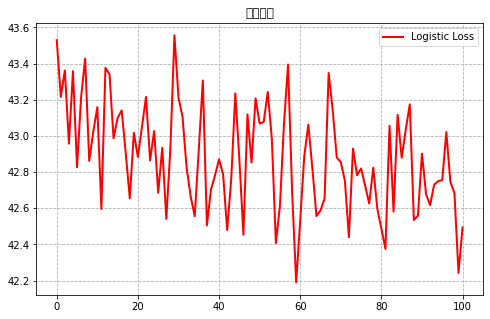

test
test
test
total_test_accuracy: tensor(0.9792, device='cuda:0')
acc_test_each_k: tensor(0.9792, device='cuda:0')
549 132
549 132
total_train_accuracy: tensor(0.9438, device='cuda:0')
Training Epoch: 0, total loss: 43.436588
total_train_accuracy: tensor(0.9583, device='cuda:0')
Training Epoch: 1, total loss: 43.087428
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 2, total loss: 43.116001
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 3, total loss: 42.737341
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 4, total loss: 42.882918
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 5, total loss: 42.751468
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 6, total loss: 42.543930
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 7, total loss: 42.802659
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 8, total loss: 42.837754
total_train_

total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 86, total loss: 42.563863
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 87, total loss: 42.796810
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 88, total loss: 42.756137
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 89, total loss: 42.343576
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 90, total loss: 42.698960
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 91, total loss: 42.725997
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 92, total loss: 42.580999
total_train_accuracy: tensor(0.9583, device='cuda:0')
Training Epoch: 93, total loss: 42.935400
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 94, total loss: 42.371161
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 95, total loss: 42.538950
total_train_accuracy: tensor(0.9625, dev

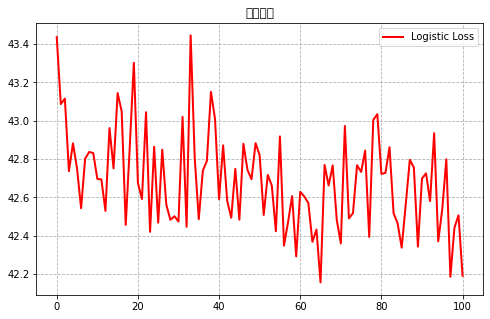

test
test
test
total_test_accuracy: tensor(0.9583, device='cuda:0')
acc_test_each_k: tensor(0.9583, device='cuda:0')
549 132
549 132
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 0, total loss: 42.602762
total_train_accuracy: tensor(0.9500, device='cuda:0')
Training Epoch: 1, total loss: 43.165724
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 2, total loss: 42.742121
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 3, total loss: 42.907042
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 4, total loss: 42.757087
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 5, total loss: 42.709222
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 6, total loss: 42.769698
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 7, total loss: 42.720598
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 8, total loss: 42.494576
total_train_

total_train_accuracy: tensor(0.9875, device='cuda:0')
Training Epoch: 85, total loss: 42.076529
total_train_accuracy: tensor(0.9833, device='cuda:0')
Training Epoch: 86, total loss: 42.242083
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 87, total loss: 42.716385
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 88, total loss: 42.783873
total_train_accuracy: tensor(0.9813, device='cuda:0')
Training Epoch: 89, total loss: 42.282086
total_train_accuracy: tensor(0.9813, device='cuda:0')
Training Epoch: 90, total loss: 42.313796
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 91, total loss: 42.285668
total_train_accuracy: tensor(0.9854, device='cuda:0')
Training Epoch: 92, total loss: 42.151935
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 93, total loss: 42.846276
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 94, total loss: 42.680235
total_train_accuracy: tensor(0.9792, dev

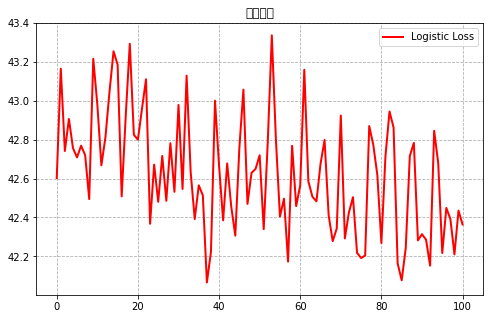

test
test
test
total_test_accuracy: tensor(1., device='cuda:0')
acc_test_each_k: tensor(1., device='cuda:0')
549 132
549 132
total_train_accuracy: tensor(0.9833, device='cuda:0')
Training Epoch: 0, total loss: 42.418236
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 1, total loss: 42.399283
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 2, total loss: 42.430027
total_train_accuracy: tensor(0.9583, device='cuda:0')
Training Epoch: 3, total loss: 42.723970
total_train_accuracy: tensor(0.9813, device='cuda:0')
Training Epoch: 4, total loss: 42.380481
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 5, total loss: 42.828590
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 6, total loss: 42.574345
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 7, total loss: 42.587286
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 8, total loss: 42.631600
total_train_accuracy

total_train_accuracy: tensor(0.9833, device='cuda:0')
Training Epoch: 85, total loss: 42.274893
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 86, total loss: 42.467107
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 87, total loss: 42.385001
total_train_accuracy: tensor(0.9833, device='cuda:0')
Training Epoch: 88, total loss: 42.196598
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 89, total loss: 42.715519
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 90, total loss: 42.421950
total_train_accuracy: tensor(0.9813, device='cuda:0')
Training Epoch: 91, total loss: 42.361041
total_train_accuracy: tensor(0.9521, device='cuda:0')
Training Epoch: 92, total loss: 43.176327
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 93, total loss: 42.497280
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 94, total loss: 42.307982
total_train_accuracy: tensor(0.9625, dev

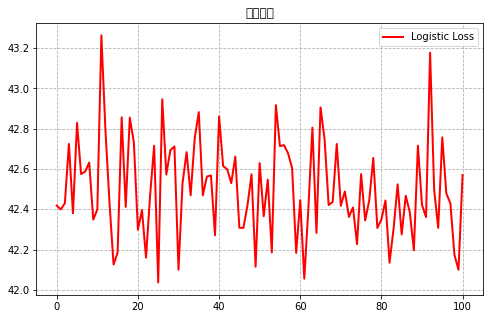

test
test
test
total_test_accuracy: tensor(1., device='cuda:0')
acc_test_each_k: tensor(1., device='cuda:0')
549 132
549 132
total_train_accuracy: tensor(0.9521, device='cuda:0')
Training Epoch: 0, total loss: 43.091415
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 1, total loss: 42.535767
total_train_accuracy: tensor(0.9833, device='cuda:0')
Training Epoch: 2, total loss: 42.322345
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 3, total loss: 42.783283
total_train_accuracy: tensor(0.9896, device='cuda:0')
Training Epoch: 4, total loss: 42.098255
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 5, total loss: 42.179027
total_train_accuracy: tensor(0.9583, device='cuda:0')
Training Epoch: 6, total loss: 42.889909
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 7, total loss: 42.592194
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 8, total loss: 42.401495
total_train_accuracy

total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 85, total loss: 42.573641
total_train_accuracy: tensor(0.9875, device='cuda:0')
Training Epoch: 86, total loss: 42.058304
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 87, total loss: 42.239535
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 88, total loss: 42.123674
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 89, total loss: 42.429304
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 90, total loss: 42.435894
total_train_accuracy: tensor(0.9833, device='cuda:0')
Training Epoch: 91, total loss: 42.019574
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 92, total loss: 42.661987
total_train_accuracy: tensor(0.9854, device='cuda:0')
Training Epoch: 93, total loss: 42.061818
total_train_accuracy: tensor(0.9542, device='cuda:0')
Training Epoch: 94, total loss: 42.834925
total_train_accuracy: tensor(0.9688, dev

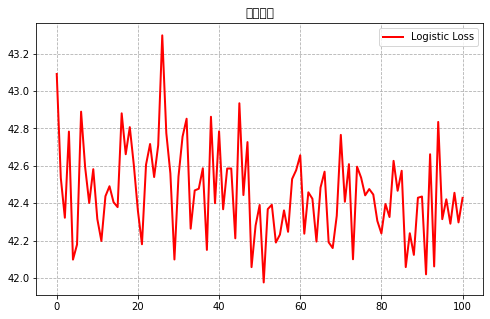

test
test
test
total_test_accuracy: tensor(1., device='cuda:0')
acc_test_each_k: tensor(1., device='cuda:0')
549 132
549 132
total_train_accuracy: tensor(0.9583, device='cuda:0')
Training Epoch: 0, total loss: 42.900894
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 1, total loss: 42.688204
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 2, total loss: 42.391407
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 3, total loss: 42.609015
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 4, total loss: 42.364763
total_train_accuracy: tensor(0.9813, device='cuda:0')
Training Epoch: 5, total loss: 42.151547
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 6, total loss: 42.380037
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 7, total loss: 42.147913
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 8, total loss: 42.087139
total_train_accuracy

total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 85, total loss: 42.281919
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 86, total loss: 42.342793
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 87, total loss: 42.544657
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 88, total loss: 42.656815
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 89, total loss: 42.446733
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 90, total loss: 42.600908
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 91, total loss: 42.203897
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 92, total loss: 42.312951
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 93, total loss: 42.537011
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 94, total loss: 42.567356
total_train_accuracy: tensor(0.9750, dev

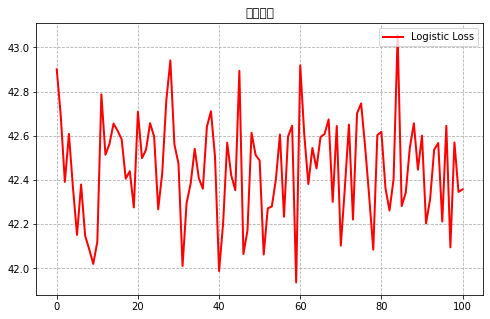

test
test
test
total_test_accuracy: tensor(1., device='cuda:0')
acc_test_each_k: tensor(1., device='cuda:0')
549 132
549 132
total_train_accuracy: tensor(0.9813, device='cuda:0')
Training Epoch: 0, total loss: 42.388742
total_train_accuracy: tensor(0.9583, device='cuda:0')
Training Epoch: 1, total loss: 42.683389
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 2, total loss: 42.482682
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 3, total loss: 42.477624
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 4, total loss: 42.281914
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 5, total loss: 42.476537
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 6, total loss: 42.278774
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 7, total loss: 42.347284
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 8, total loss: 42.761232
total_train_accuracy

total_train_accuracy: tensor(0.9813, device='cuda:0')
Training Epoch: 85, total loss: 41.983028
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 86, total loss: 42.130613
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 87, total loss: 42.388234
total_train_accuracy: tensor(0.9354, device='cuda:0')
Training Epoch: 88, total loss: 43.557273
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 89, total loss: 42.609888
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 90, total loss: 42.758138
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 91, total loss: 42.677915
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 92, total loss: 42.450777
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 93, total loss: 42.657696
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 94, total loss: 42.443523
total_train_accuracy: tensor(0.9792, dev

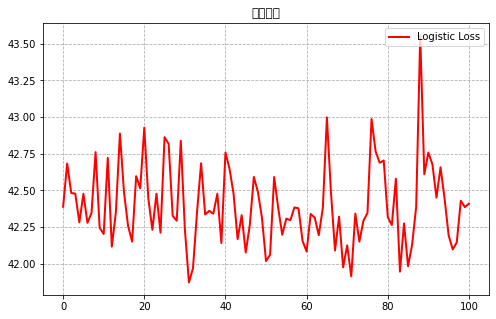

test
test
test
total_test_accuracy: tensor(1., device='cuda:0')
acc_test_each_k: tensor(1., device='cuda:0')
[tensor(0.8333, device='cuda:0'), tensor(0.9167, device='cuda:0'), tensor(1., device='cuda:0'), tensor(0.9792, device='cuda:0'), tensor(0.9583, device='cuda:0'), tensor(1., device='cuda:0'), tensor(1., device='cuda:0'), tensor(1., device='cuda:0'), tensor(1., device='cuda:0'), tensor(1., device='cuda:0')]
[array(0.8333334, dtype=float32), array(0.9166667, dtype=float32), array(1., dtype=float32), array(0.9791667, dtype=float32), array(0.9583334, dtype=float32), array(1., dtype=float32), array(1., dtype=float32), array(1., dtype=float32), array(1., dtype=float32), array(1., dtype=float32)]
acc_test_metrics: 0.96875


In [20]:
model=model4
K=10
test_metrics=[]
train_loss_total_list=[]
for ki in range(K):
    trainset = KZDataset(csv_path='dataset/qiuguan/origin_800/xiaoqiu_xiaoguan/ConvMLP2/train_val_info.csv',K=K, n_class=nfm_config['n_class'],ki=ki,  typ='train', transform=None, rand=True)
    valset = KZDataset(csv_path='dataset/qiuguan/origin_800/xiaoqiu_xiaoguan/ConvMLP2/train_val_info.csv', K=K,n_class=nfm_config['n_class'],ki=ki,  typ='val', transform=None, rand=True)
    train_loader = data.DataLoader(
         dataset=trainset,
         #transform=torchvision.transforms.ToTensor(),
         drop_last=True,
         batch_size=nfm_config['batch_size'],
         shuffle=True)
    val_loader = data.DataLoader(
         dataset=valset,
         #transform=torchvision.transforms.ToTensor(),
         drop_last=True,
         batch_size=nfm_config['batch_size']
        
     )
    
    model_path='models/ConvMLP2/ConvMLP2_20/'
    #BATCH_SIZE=batch_size
    optimizer = torch.optim.Adam(model.parameters(), lr=nfm_config['lr'], weight_decay=nfm_config['l2_regularization'])
    #total = 0
    
    
    loss_func=torch.nn.CrossEntropyLoss()
    
    num=0
   
    
    epoches=101
    for epoch_id in range(epoches):
          
        
        
        train_loss_total,acc_train=train_epoch(model,train_loader,nfm_config['batch_size'],optimizer,loss_func)
        train_loss_total_list.append(train_loss_total)#
        if epoch_id %20==0:
            num=num+1
            #path=os.path.join(model_path,'MLP'+str(num)+str(K)+'.pkl')
            #torch.save(model.state_dict(),path)
            # 保存模型
            
            path=os.path.join(model_path,'MLP'+str(num)+str(K)+'.pt')##################pt
            torch.save(model.state_dict(),path)
            #torch.save(model.state_dict(),path)
    print("the ",ki," epoch ends")
    plotLoss(train_loss_total_list,epoches)
    train_loss_total_list=[]
    acc_test=val_epoch(model,val_loader,nfm_config['batch_size'],optimizer)
    print("acc_test_each_k:",acc_test)
    test_metrics.append(acc_test)

print(test_metrics)
#test_metrics=test_metrics.tolist()
test_metrics=[x.cpu().detach().numpy() for x in test_metrics]
print(test_metrics)
acc_test_metrics=np.mean(test_metrics) 
print("acc_test_metrics:",acc_test_metrics)
       


MLP4(
  (bn0): BatchNorm1d(131, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=131, out_features=2000, bias=True)
  (bn1): BatchNorm1d(2000, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc2): Linear(in_features=2000, out_features=100, bias=True)
  (bn2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc3): Linear(in_features=100, out_features=9, bias=True)
  (bn3): BatchNorm1d(9, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (drop): Dropout(p=0.5, inplace=False)
)
138 132
f1_score:  %.4f 0.8939108216885994
accuracy_score: 0.8985507246376812
recall_score: 0.8926704014939308
pre_recall: 0.9096153547766451
n_classes: 9


/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:58: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:59: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:58: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:59: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or 

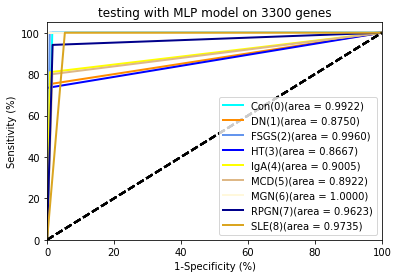

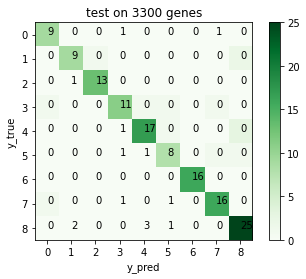

In [21]:
import torch

#功能：加载保存到path中的各层参数到神经网络

#path='dataset/qiuguan/model_new_K_fold_RandomTree/MLP_non_encode/MLP610.pkl'
#path='dataset/qiuguan/model_new_K_fold_RandomTree/MLP_non_encode/MLP9110.pkl'
path='models/ConvMLP2/ConvMLP2_20/MLP610.pt'
#path='dataset/qiuguan/model_new_K_fold_RandomTree/MLP_non_encode/MLP10910.pkl'
#nfm=NFM(nfm_config)
#mlp=MLP()
mlp=MLP4()
#print(nfm)
#net = nn.DataParallel(net)
#net = net.to(device)
mlp.load_state_dict(torch.load(path),strict=False)
mlp.cuda()

print(mlp)




mlp_params = list(mlp.named_parameters())
#print(nfm_params)
net=mlp


testset = KZDatasetTest(csv_path='dataset/qiuguan/origin_800/xiaoqiu_xiaoguan/ConvMLP2/test_info.csv')
   
test_loader = data.DataLoader(
         dataset=testset,
         #transform=torchvision.transforms.ToTensor(),
         
         batch_size=nfm_config['batch_size']
        
     )
#———————————————— 
#版权声明：本文为CSDN博主「山阴少年」的原创文章，遵循CC 4.0 BY-SA版权协议，转载请附上原文出处链接及本声明。 
#原文链接：https://blog.csdn.net/jclian91/article/details/121708431# 
from torch.autograd import Variable 
from torch.utils.data import DataLoader 
from sklearn.metrics import roc_auc_score 
from sklearn.metrics import accuracy_score 
 
def evaluate_model(test_dl, model): 
    model.eval()#测试数据稳定
    predictions, actuals = [], [] 
    for i, (inputs, targets) in enumerate(test_dl): 
        # evaluate the model on the test set 
        #print(\ inputs:\ ,inputs) 
        #print(\ targets:\ ,targets) 
        inputs = Variable(inputs) 
        targets = Variable(targets) 
                 
                 
        #x = torch.tensor(x, dtype=torch.float) 
        #x=x.clone().detach().requires_grad_(True) 
        inputs=torch.tensor(inputs,dtype=torch.float) 
        targets=torch.tensor(targets,dtype=torch.float) 
        inputs, targets = inputs.cuda(), targets.cuda() 
        yhat = model(inputs) 
        yhat=(yhat==torch.max(yhat,1,keepdim=True)[0]).to(dtype=torch.int32)
        # retrieve numpy array 
        #yhat = yhat.detach().numpy() 
        yhat = yhat.detach().cpu().numpy()#转换到cpu 
        # yhat=yhat.argmax(axis=1) 
        #print(yhat:\ ,yhat) 
        #print('yhat.shape:',yhat.shape) 
        actual = targets.detach().cpu().numpy() 
        actual=actual.round() 
        #print(\ actual:\ ,actual) 
        #print('actual.shape:',actual.shape
        #predictions.appe) 
        #actual = actual.reshape(-1, 1) 
        # round to class values 
        yhat = yhat.round() 
        # store nd(yhat) 
        actuals.append(actual) 
        predictions.append(yhat)
    #print("prediction:" ,predictions) 
    #print("actuals:",actuals) 
    predictions, actuals = np.vstack(predictions), np.vstack(actuals) 
    #print("prediction:" ,predictions) 
    #print("actuals:" ,actuals) 
    # calculate accuracy 
    acc_test = accuracy_score(actuals, predictions) 
    return  actuals, predictions,acc_test 

import torch.nn.functional as F 
from sklearn.metrics import precision_recall_curve, average_precision_score,roc_curve, auc, precision_score, recall_score, f1_score, confusion_matrix, accuracy_score 

import torch.nn.functional as F 
from sklearn.metrics import precision_recall_curve, average_precision_score,roc_curve, auc, precision_score, recall_score, f1_score, confusion_matrix, accuracy_score 

import torch.nn.functional as F 

actuals,predictions,acc_test=evaluate_model(test_loader,net)


import torch.nn.functional as F 

actuals,predictions,acc_test=evaluate_model(test_loader,net)


from sklearn.metrics import precision_recall_curve, average_precision_score,roc_curve, auc, precision_score, recall_score, f1_score, confusion_matrix, accuracy_score 
target_list=actuals 
pred_list=predictions 
      
y_true=target_list 
y_pred=pred_list 
      
f1=f1_score(y_true=target_list, y_pred=pred_list, average='macro') # 也可以指定micro模式 
acc_score=accuracy_score(y_true=target_list, y_pred=pred_list) 
rec_score=recall_score(y_true=target_list,y_pred=pred_list,average='macro') # 也可以指定micro模式 
pre_recall=precision_score(y_true=target_list,y_pred=pred_list,average='macro') 
print("f1_score:  %.4f" ,f1) 
print("accuracy_score:" ,acc_score) 
print("recall_score:",rec_score) 
print("pre_recall:" ,pre_recall)



auc_curve = roc_auc_score(y_true, y_pred, multi_class='ovo')
#———————————————— 
#版权声明：本文为CSDN博主「农民小飞侠」的原创文章，遵循CC 4.0 BY-SA版权协议，转载请附上原文出处链接及本声明。 
#原文链接：https://blog.csdn.net/w5688414/article/details/106595892 
PM_y=y_pred 
true_y=y_true 
n_classes=PM_y.shape[1] 
      
print("n_classes:",n_classes) 
fpr = dict() 
tpr = dict() 
roc_auc = dict() 
for i in range(n_classes): 
    fpr[i], tpr[i], _ = roc_curve(true_y[:, i], PM_y[:, i]) 
    roc_auc[i] = auc(fpr[i], tpr[i]) 
    #print(i) 
    #print(fpr) 
    #print(tpr) 
    
    
    
#计算macro auc 
from scipy import interp 
# First aggregate all false positive rates 
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)])) 
       
# Then interpolate all ROC curves at this points 
mean_tpr = np.zeros_like(all_fpr) 
for i in range(n_classes): 
    mean_tpr += interp(all_fpr, fpr[i], tpr[i]) 
       
    # Finally average it and compute AUC 
    mean_tpr /= n_classes 
       
    fpr["macro"] = all_fpr 
    tpr["macro"] = mean_tpr 
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])
    
    
    
#画图 
      
import matplotlib.pyplot as plt 
from itertools import cycle 
from matplotlib.ticker import FuncFormatter 
lw = 2 
# Plot all ROC curves 
plt.figure() 
labels=['Con(0)','DN(1)','FSGS(2)','HT(3)','IgA(4)','MCD(5)','MGN(6)','RPGN(7)','SLE(8)'] 

'''
plt.plot(fpr["macro"], tpr["macro"], 
              label='macro-average ROC curve (area = {0:0.4f})' 
                    ''.format(roc_auc["macro"]), 
              color='navy', linestyle=':', linewidth=4) 
'''

       
colors = cycle(['aqua', 'darkorange', 'cornflowerblue','blue','yellow','burlywood','cornsilk','darkblue','goldenrod','greenyellow','maroon']) 
for i, color in zip(range(n_classes), colors): 
    plt.plot(fpr[i], tpr[i], color=color, lw=lw, 
                  label=labels[i]+'(area = {0:0.4f})'.format(roc_auc[i])) 
       
    plt.plot([0, 1], [0, 1], 'k--', lw=lw) 
    plt.xlim([0.0, 1.0]) 
    plt.ylim([0.0, 1.05]) 
      
      
    plt.xlabel('1-Specificity (%)') 
    plt.ylabel('Sensitivity (%)') 
    #plt.title('testing on kidney tubules with F800 without augment') 
    plt.title('testing with MLP model on 3300 genes')   

        
def to_percent(temp, position): 
    return '%1.0f'%(100*temp) 
      
plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent)) 
plt.gca().xaxis.set_major_formatter(FuncFormatter(to_percent)) 
plt.legend(loc="lower right" ) 
      
plt.show() 

#———————————————— 
#版权声明：本文为CSDN博主「山阴少年」的原创文章，遵循CC 4.0 BY-SA版权协议，转载请附上原文出处链接及本声明。 
#原文链接：https://blog.csdn.net/jclian91/article/details/103074506/ 
      
from sklearn.metrics import confusion_matrix 
import matplotlib.pyplot as plt 
import matplotlib as mpl 
      
# 支持中文字体显示, 使用于Mac系统 
#zhfont=mpl.font_manager.FontProperties(fname=\ /Library/Fonts/Songti.ttc\ ) 
      
y_true=actuals# = ['北京', '上海', '成都', '成都', '上海', '北京', '上海', '成都', '北京', '上海'] 
y_pred=predictions #= ['北京', '上海', '成都', '上海', '成都', '成都', '上海', '成都', '北京', '上海'] 
      
#ValueError: multilabel-indicator is not supported 
      
classes = [0,1,2,3,4,5,6,7,8] 
#confusion = confusion_matrix(y_true, y_pred)#ValueError: multilabel-indicator is not supported 
      
confusion = confusion_matrix(y_true.argmax(axis=1), y_pred.argmax(axis=1)) 
# 绘制热度图 
plt.imshow(confusion, cmap=plt.cm.Greens) 
indices = range(len(confusion)) 
#plt.xticks(indices, classes, fontproperties=zhfont) 
#plt.yticks(indices, classes, fontproperties=zhfont) 
      
plt.xticks(indices, classes) 
plt.yticks(indices, classes) 
plt.colorbar() 
plt.xlabel('y_pred') 
plt.ylabel('y_true') 
plt.title('test on 3300 genes')      
# 显示数据 
for first_index in range(len(confusion)): 
    for second_index in range(len(confusion[first_index])): 
        plt.text(first_index, second_index, confusion[first_index][second_index]) 
      
# 显示图片 
plt.show()